# Исследование по выявлению закономерностей определяющих успешность игры. 

**Описание проекта**  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Сейчас декабрь 2016 г., планируется кампания на 2017-й. Неважно, делается прогноз продаж на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. Нужно отработать принцип работы с данными.

**Описание данных**  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».    
Данные за 2016 год могут быть неполными.  

## Изучение общей информации о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    raw_data = pd.read_csv('/datasets/games.csv')
except:
    raw_data = pd.read_csv('C:\\Users\\Константин\\Desktop\\Файлы\\Модуль 1\\games.csv')

In [3]:
raw_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
raw_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


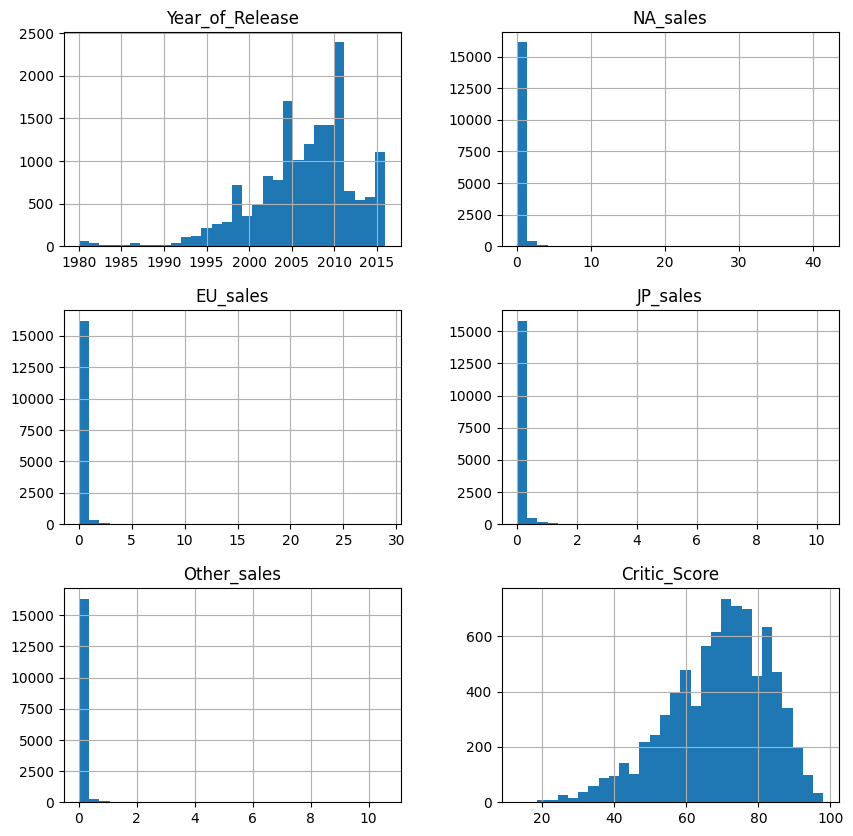

In [6]:
raw_data.hist(bins=30,figsize=(10, 10));

**В таблице присутствуют:**
- Не верно указанные форматы. Пример: 'Year_of_Release' целочисленные значения, а формат float64.
- Не корректный регистр в названиях. Присутствуют прописные буквы.
- Пропуски. Пример: 'Critic_Score'
- Редкие и выбивающиеся значения. Пример: графики с продажами.

## Подготовка данных

### Коррекция таблицы

Замените названия столбцов (приведите к нижнему регистру)

In [7]:
raw_data.columns = raw_data.columns.str.lower()

### Обработка пропусков

In [8]:
raw_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценим столбец 'name'.

In [9]:
raw_data[raw_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два пропуска в имени и два пропуска в жанре. Данны могли быть повреждены при хранении за столь длительный срок. Для восстановления мало данных. Удалим.

In [10]:
raw_data.shape

(16715, 11)

In [11]:
data = raw_data.dropna(subset=['name'])

In [12]:
data.shape

(16713, 11)

Оценим столбец 'year_of_release'.

In [13]:
data['year_of_release'].isna().sum()

269

Заменим пропуски в годах выпуска на значения которые указаны у игр с одинаковым названием.

In [14]:
data['year_of_release'] = (data['year_of_release']
                           .fillna(data.groupby(by=['name'])['year_of_release']
                           .transform(lambda x:x.mode(dropna=False)[0]))
                          )

C:\Users\Константин\AppData\Local\Temp\ipykernel_27216\1997189875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = (data['year_of_release']


In [15]:
data['year_of_release'].isna().sum()

173

Проверим есть ли среди пропусков хиты.

In [16]:
sample = data[data['year_of_release'].isna()] #отделяем пропуски

In [17]:
a = sum(data.loc[:,'na_sales':'other_sales'].sum(axis=1)) #общая сумма проданных копий 
b = data['name'].count() #общее количество данных
y = sum(sample.loc[:,'na_sales':'other_sales'].sum(axis=1)) #общая сумма проданных копий с пропусками
z = data['year_of_release'].isna().sum() #общее количество пропусков
#Вычислим проценты
interest_of_the_total = z/b
interest_of_the_sales = y/a
print('{0:.2%}'.format(interest_of_the_total), 'занимают пропуски от общего количества данных')
print('{0:.2%}'.format(interest_of_the_sales), 'проданных копий от ощей суммы')

1.04% занимают пропуски от общего количества данных
0.59% проданных копий от ощей суммы


Считаю, что в данной выборке хитов нет. Можно удалить.

In [18]:
data.shape

(16713, 11)

In [19]:
data = data.dropna(subset=['year_of_release'])

Пропуски могли возникнуть при заполнении.

In [20]:
data.shape

(16540, 11)

Оценим столбец 'rating'.

In [21]:
data['rating'].value_counts(dropna=False)

rating
NaN     6694
E       3952
T       2928
M       1550
E10+    1403
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

«E» («Everyone») — «Для всех»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«EC» («Early childhood») — «Для детей младшего возраста»   
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»  

«K-A» «Для всех» в 1998 году был переименован в «E» («Everyone») – для всех возрастов, заменим его.

In [22]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Заменим пропуски в рейтинге на значения которые указаны у игр с одинаковым названием.

In [23]:
data['rating'] = (data['rating']
        .fillna(data.groupby(by=['name'])['rating']
        .transform(lambda x:x.mode(dropna=False)[0])))

C:\Users\Константин\AppData\Local\Temp\ipykernel_27216\1190676100.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  .transform(lambda x:x.mode(dropna=False)[0])))
C:\Users\Константин\AppData\Local\Temp\ipykernel_27216\1190676100.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  .transform(lambda x:x.mode(dropna=False)[0])))


Удалим рейтинги с маленьким количеством игр. Остальные пропуски заменим на 'не определен'.

In [24]:
data = data[(data['rating'] != 'EC')]
data = data[(data['rating'] != 'RP')]
data = data[(data['rating'] != 'AO')]
data['rating'] = data['rating'].fillna(value='undefined')

Пропуски могли возникнуть из-за того что при сборе данных использовалась одна система оценки рейтингов. Entertainment Software Rating Board (ESRB). Где используется: США, Канада, Мексика. В Японии этим занимается Computer Entertainment Rating Organization (CERO).

Оценим столбец 'critic_score'.

Оценим столбец 'user_score'.

In [25]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В оценке пользователей есть аббревиатура 'tbd'. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим на NaN.

In [26]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Заменим тим данных на 'float', чтобы обработать остальные пропуски и в дальнейшем производить вычисления.

In [27]:
data['user_score'] = data['user_score'].astype('float')

Остальные пропуски в оценках оставим. Их не заполнить средним значением или медианной так как оценки могут сильно отличатся от игры к игре. Поиск займет много времени или может закончиться ни чем.

**Вывод:** В столбцах 'critic_score', 'user_score', 'rating' имеется большое количество пропусков. Часть из них были заполнены или удалены, но большинство были оставлены, чтобы их замена не повлияла на исследования. Пропуски могут быть связаны с тем, что оценки и рейтинг не были присвоены по региональным особенностям, не популярности,  припушены при заполнении или ждут присвоения.

### Обработка типов данных

В столбце 'user_score' тип данных был изменен выше.

Заменим тип данных в столбце 'year_of_release' на 'int'. Для экономии памяти.

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int16')

### Обработка дубликатов

In [29]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов.

In [30]:
data[data.duplicated(subset=['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [31]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,T
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,T
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [32]:
data.shape

(16528, 11)

Удалим неявные дубликаты.

In [33]:
duplicate = data[data.duplicated(subset=['name','platform'])].index #список индексов с дубликатами
for d in duplicate:
    data.drop([d],inplace=True)

In [34]:
data.shape

(16524, 11)

Дубликаты отсутствуют.

### Обработка аномальных значений

Изучим данные, выявим столбцы с выделяющимися значениями.

In [35]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16524.000000,16524.000000,16524.000000,16524.000000,16524.000000,8049.000000,7517.000000
mean,2006.483055,0.264109,0.145920,0.078220,0.047609,68.981613,7.124504
std,5.867385,0.817422,0.505954,0.310446,0.187708,13.930000,1.498782
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Составим список и построим график для поиска аномалий.

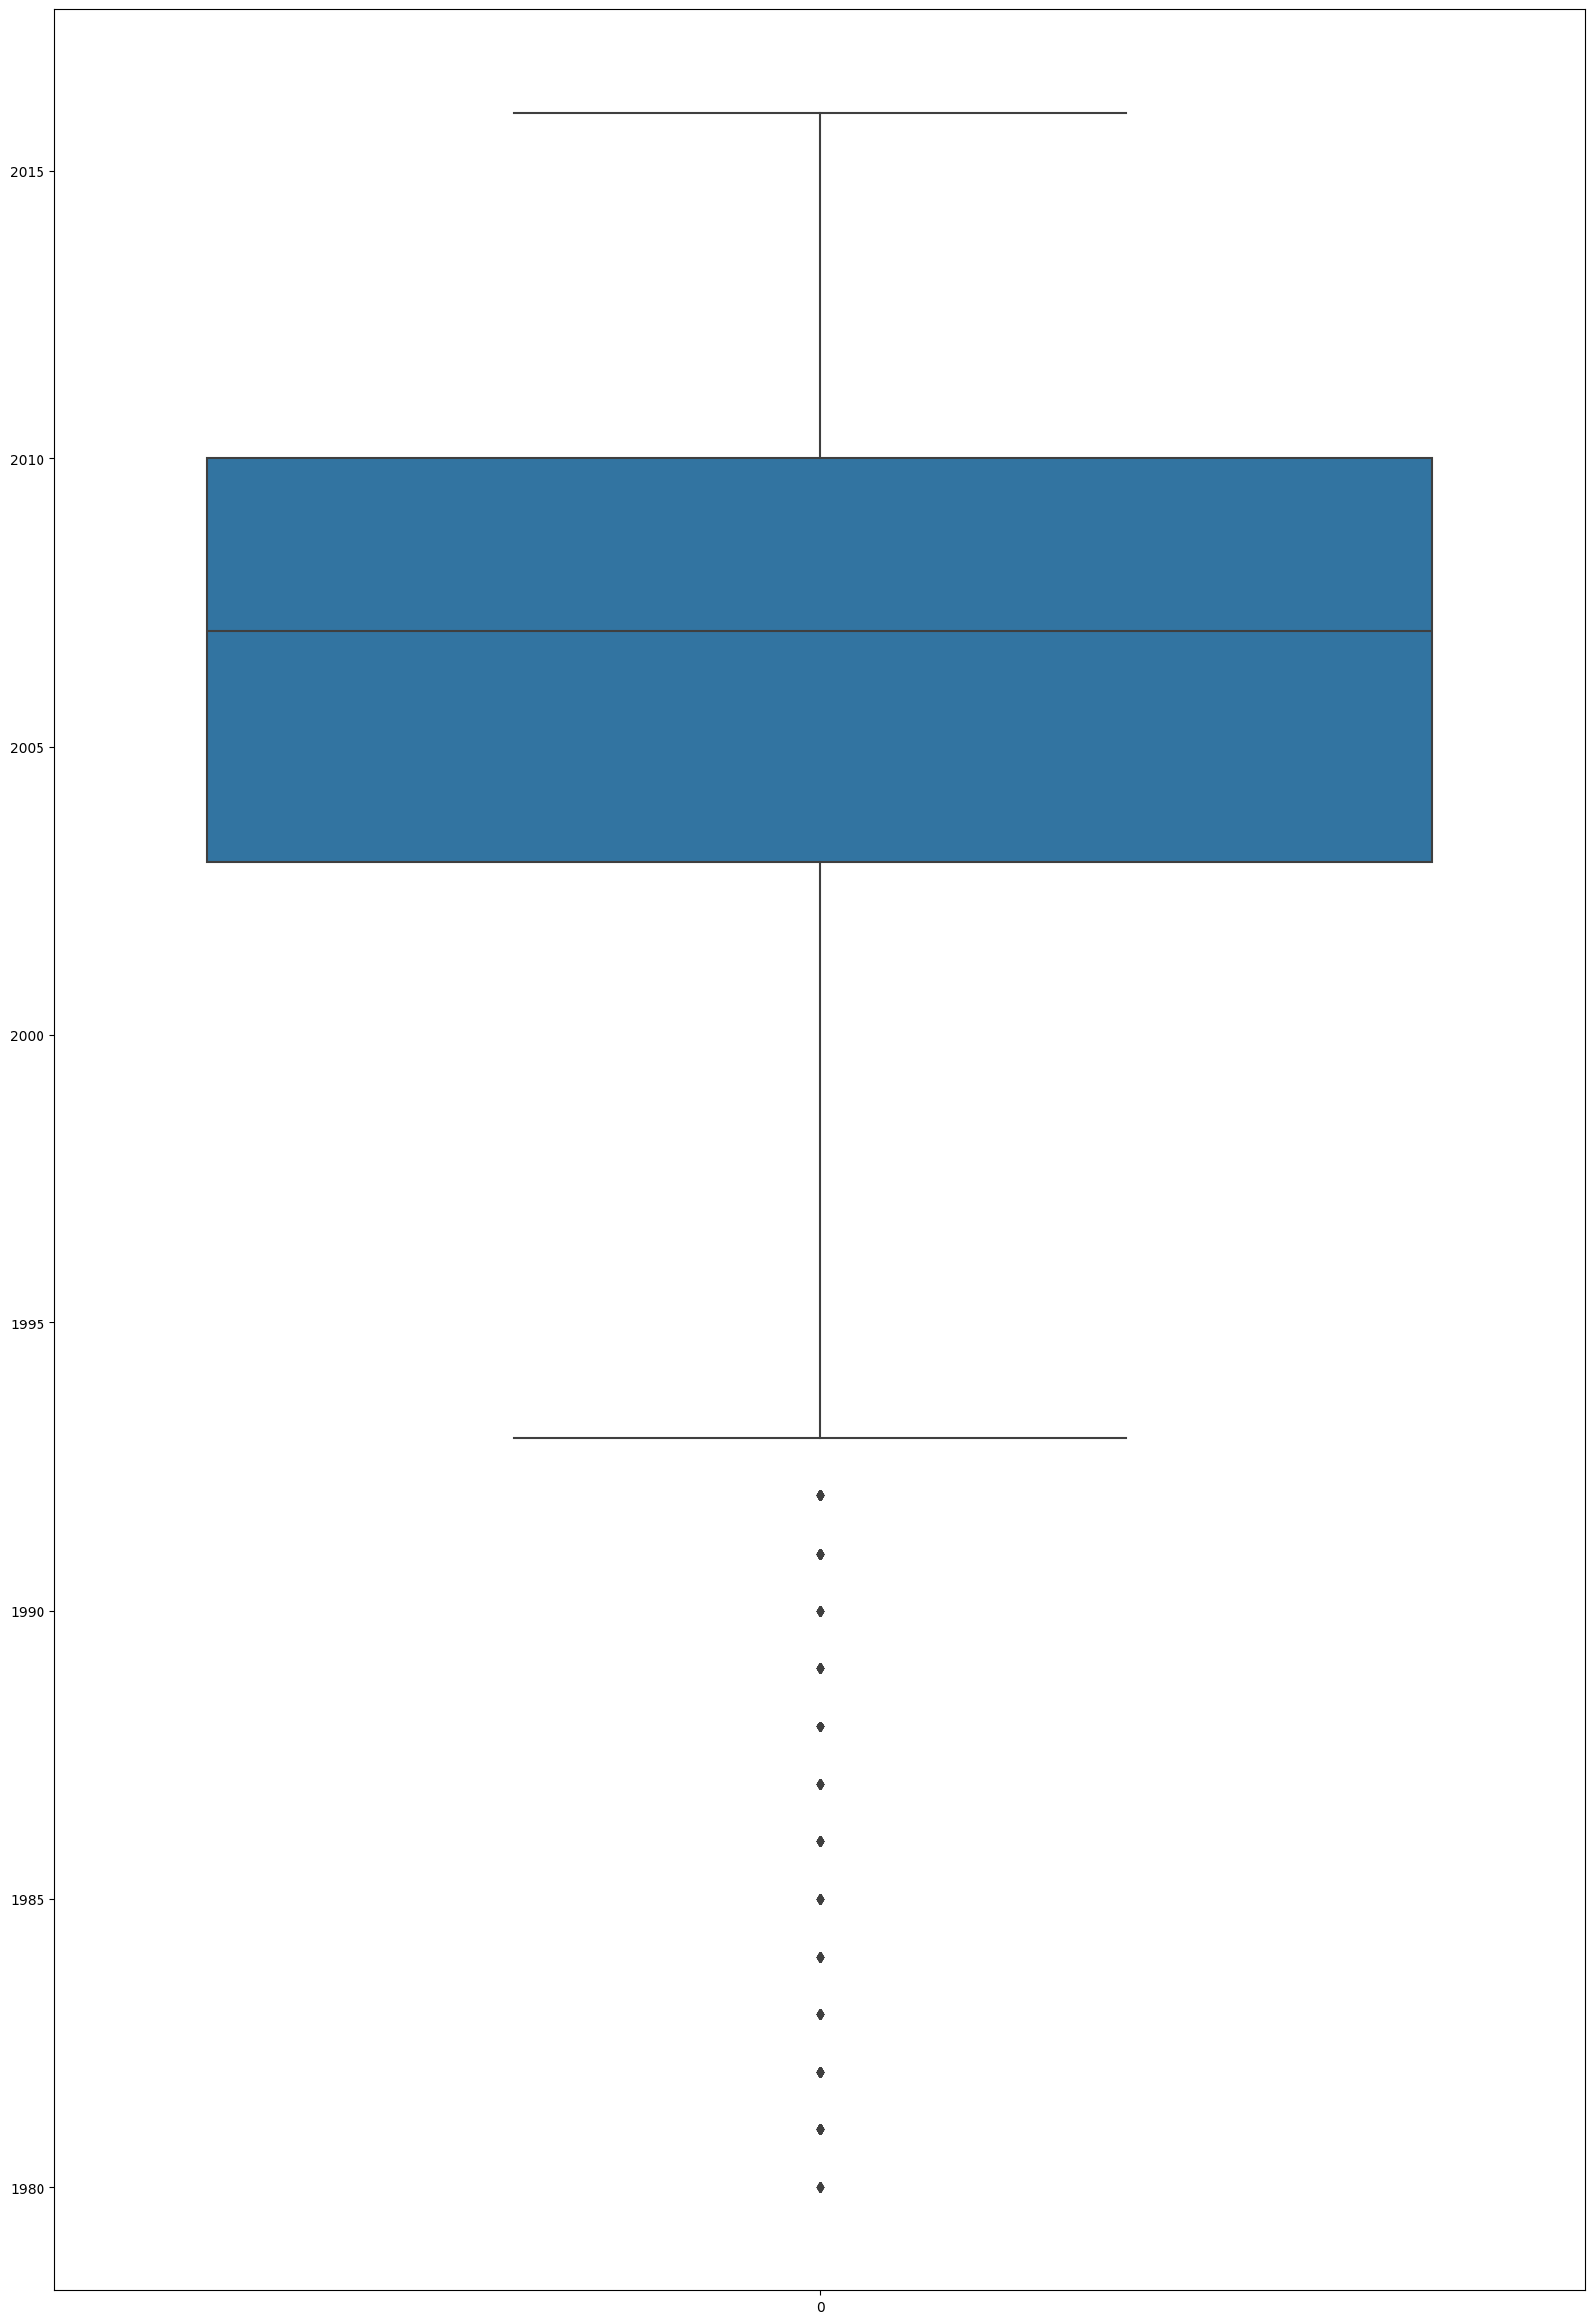

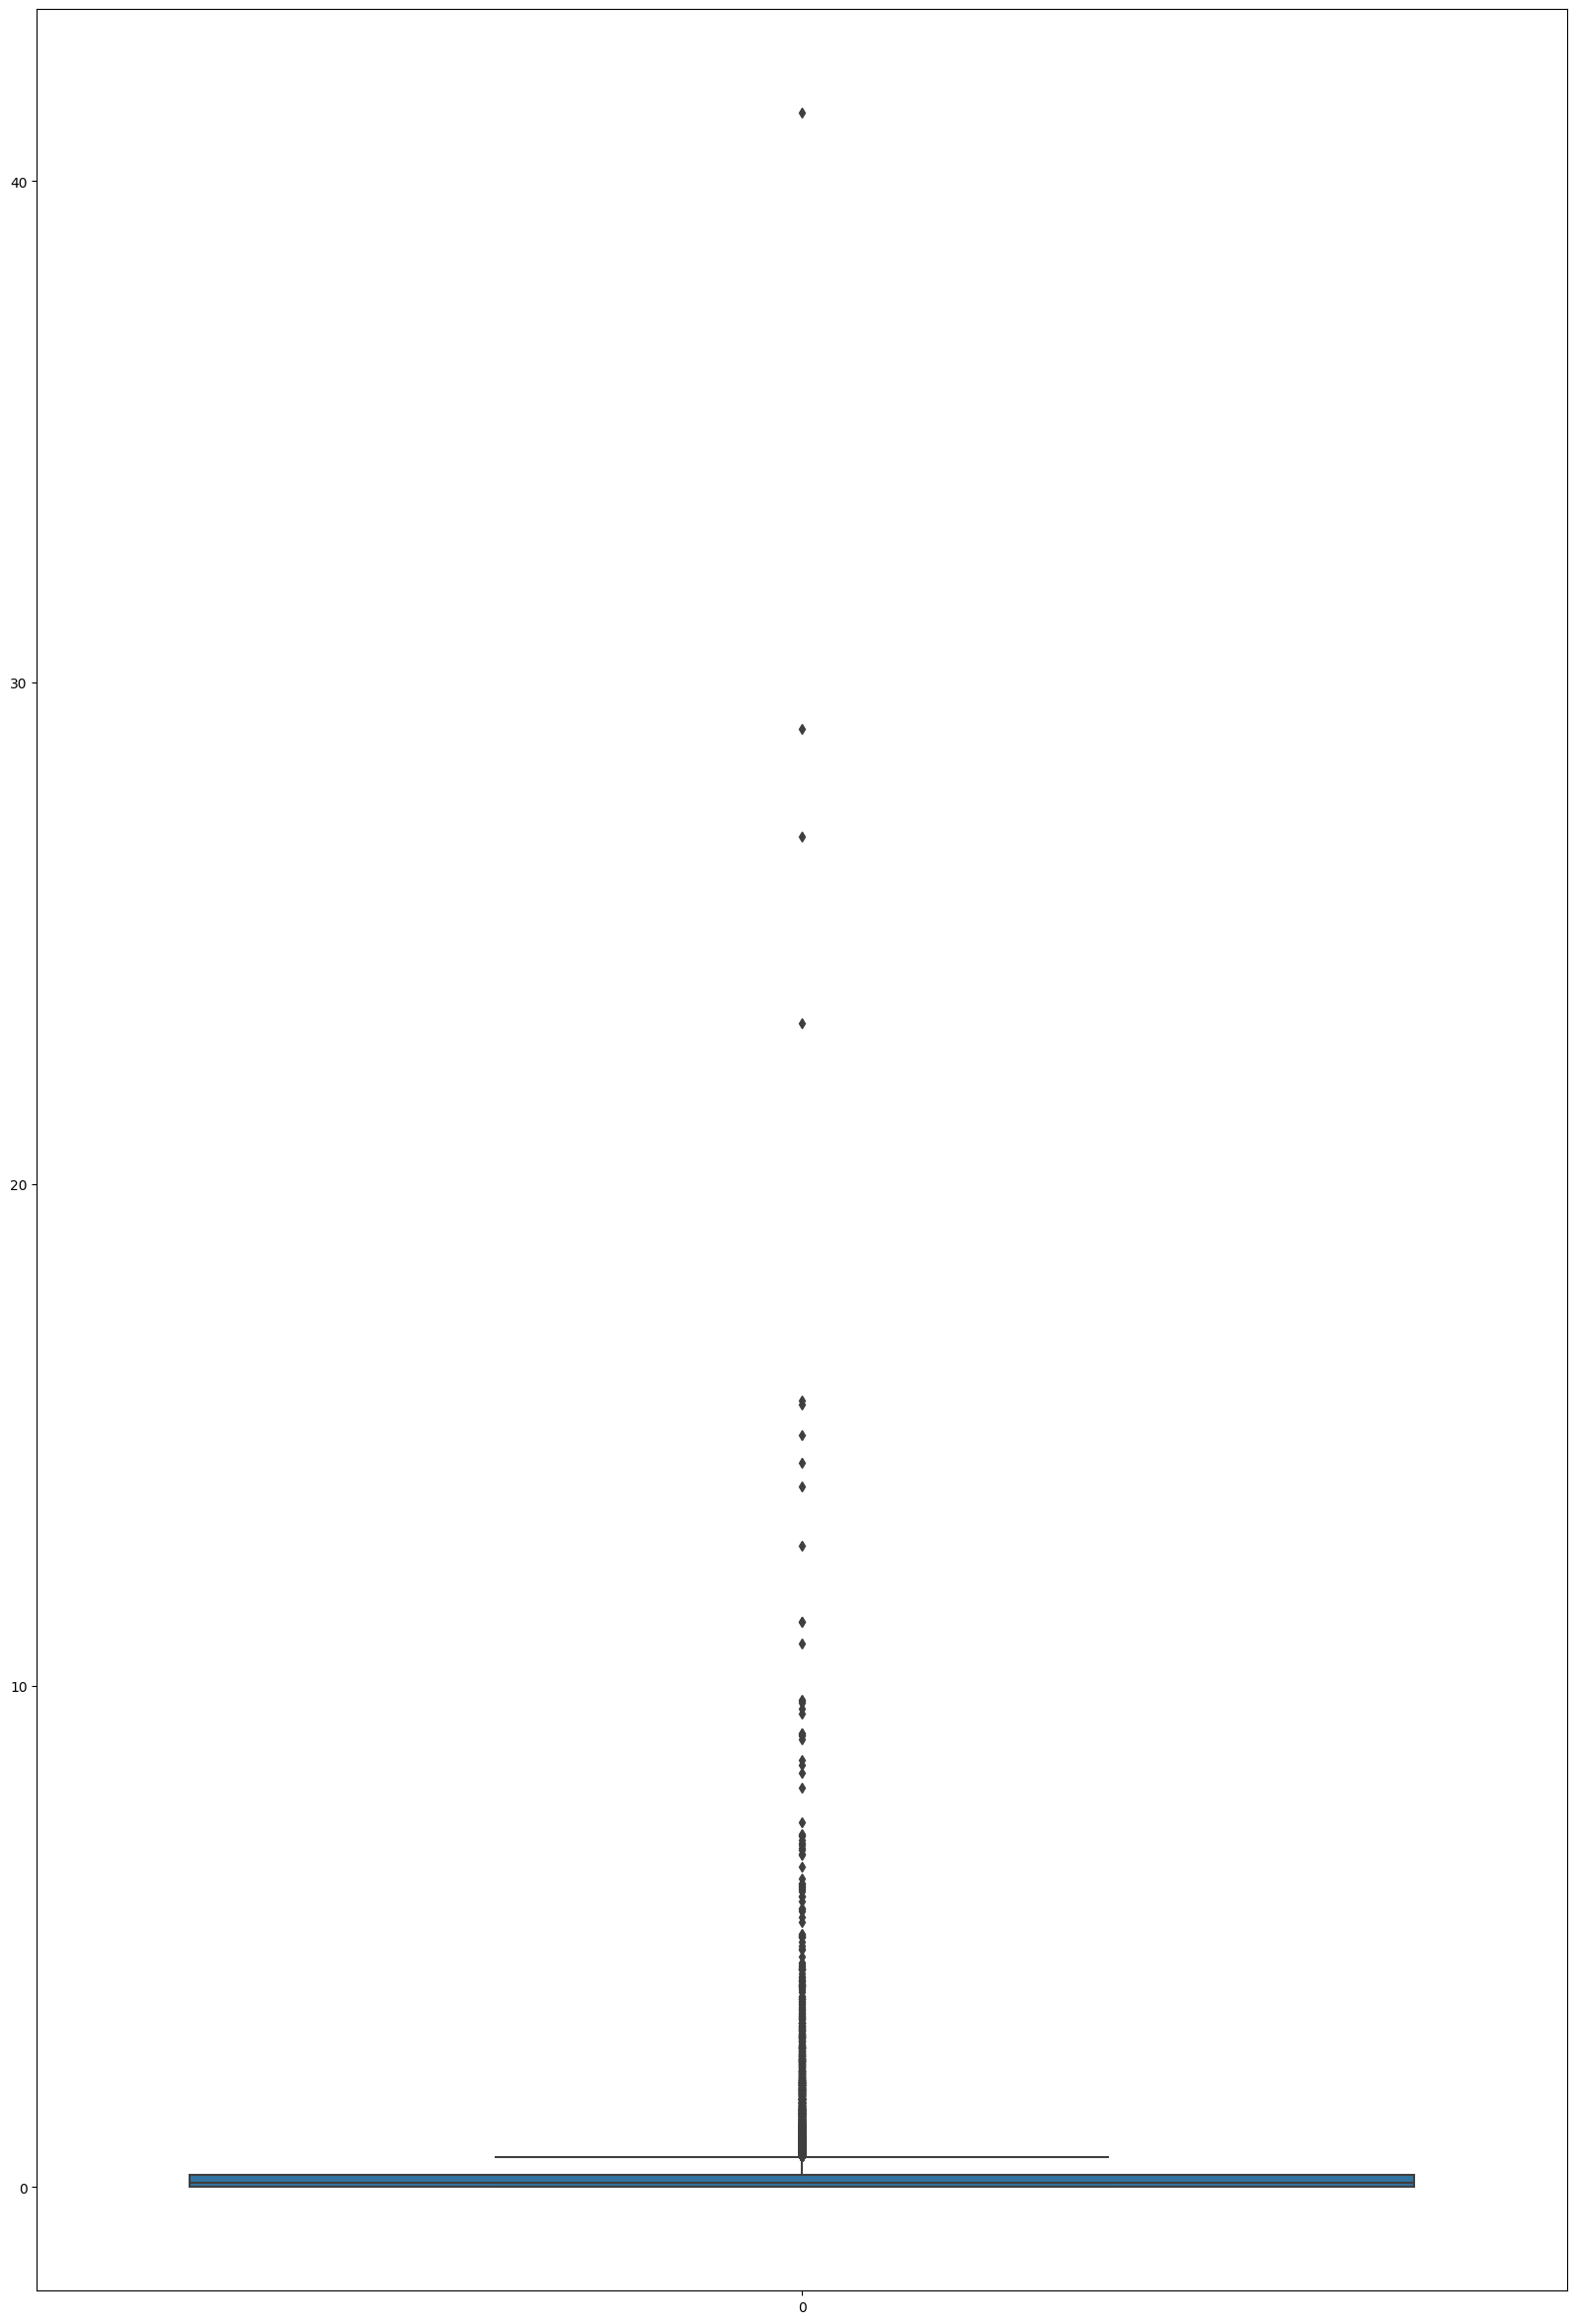

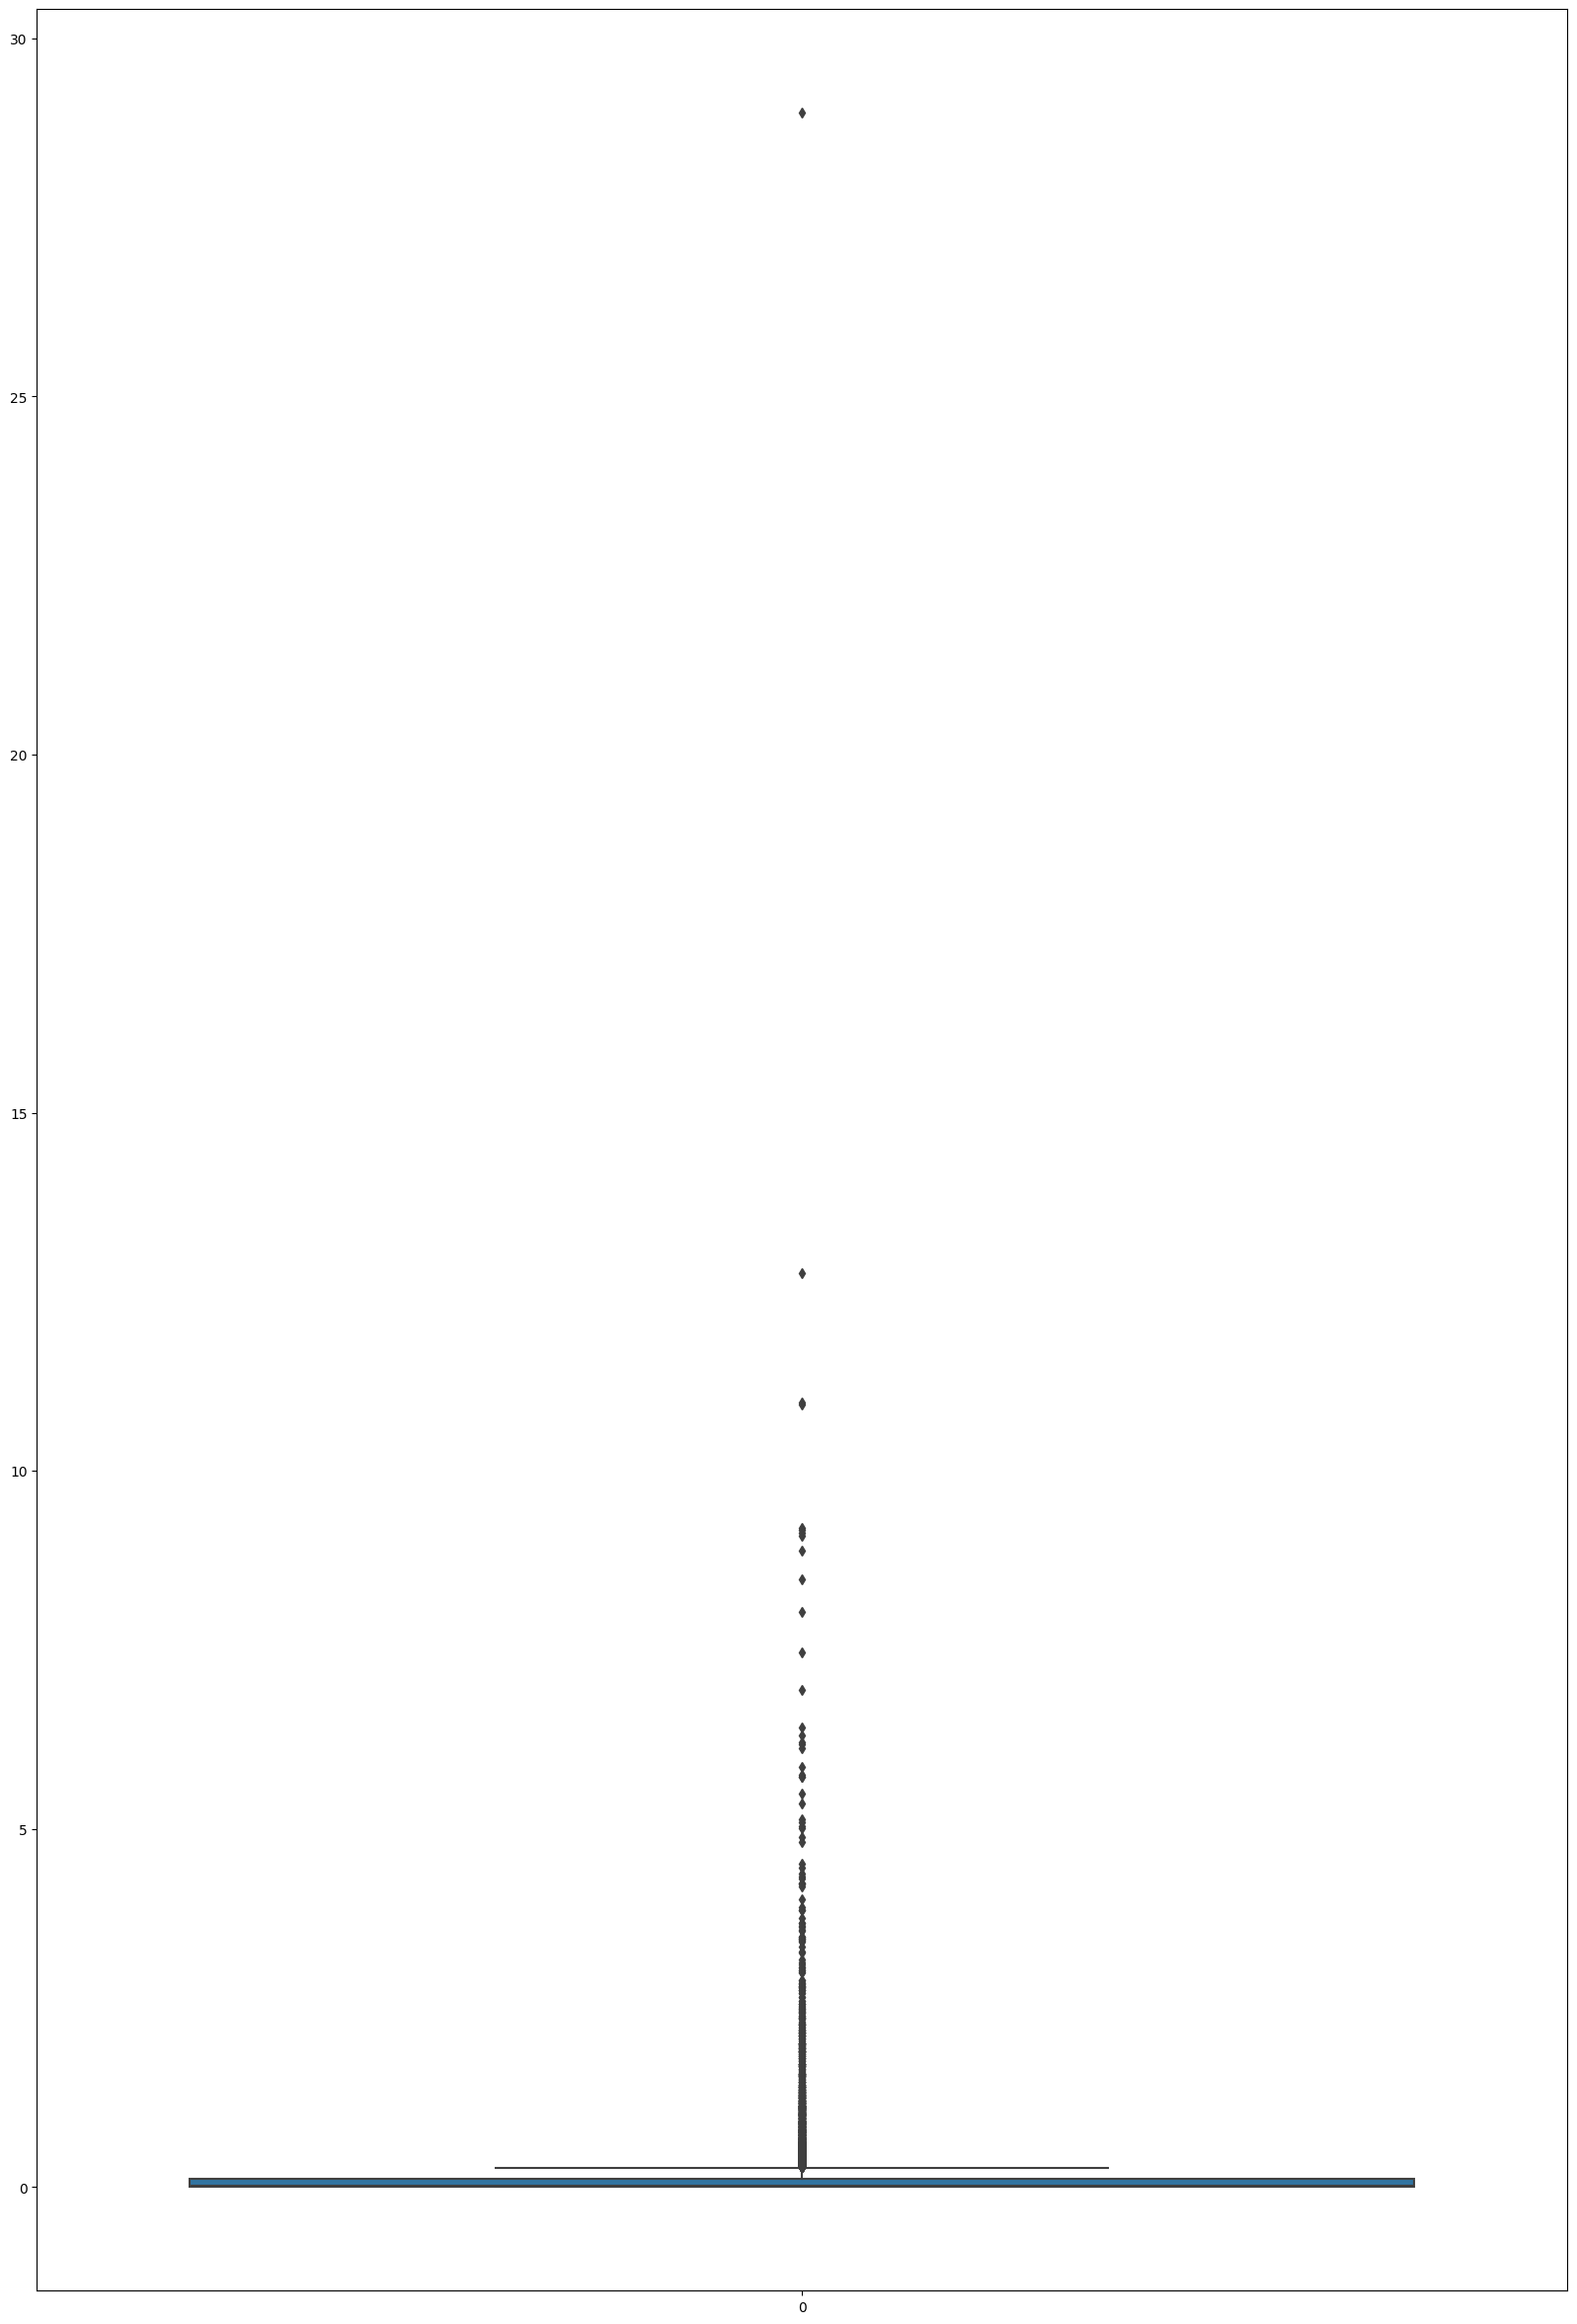

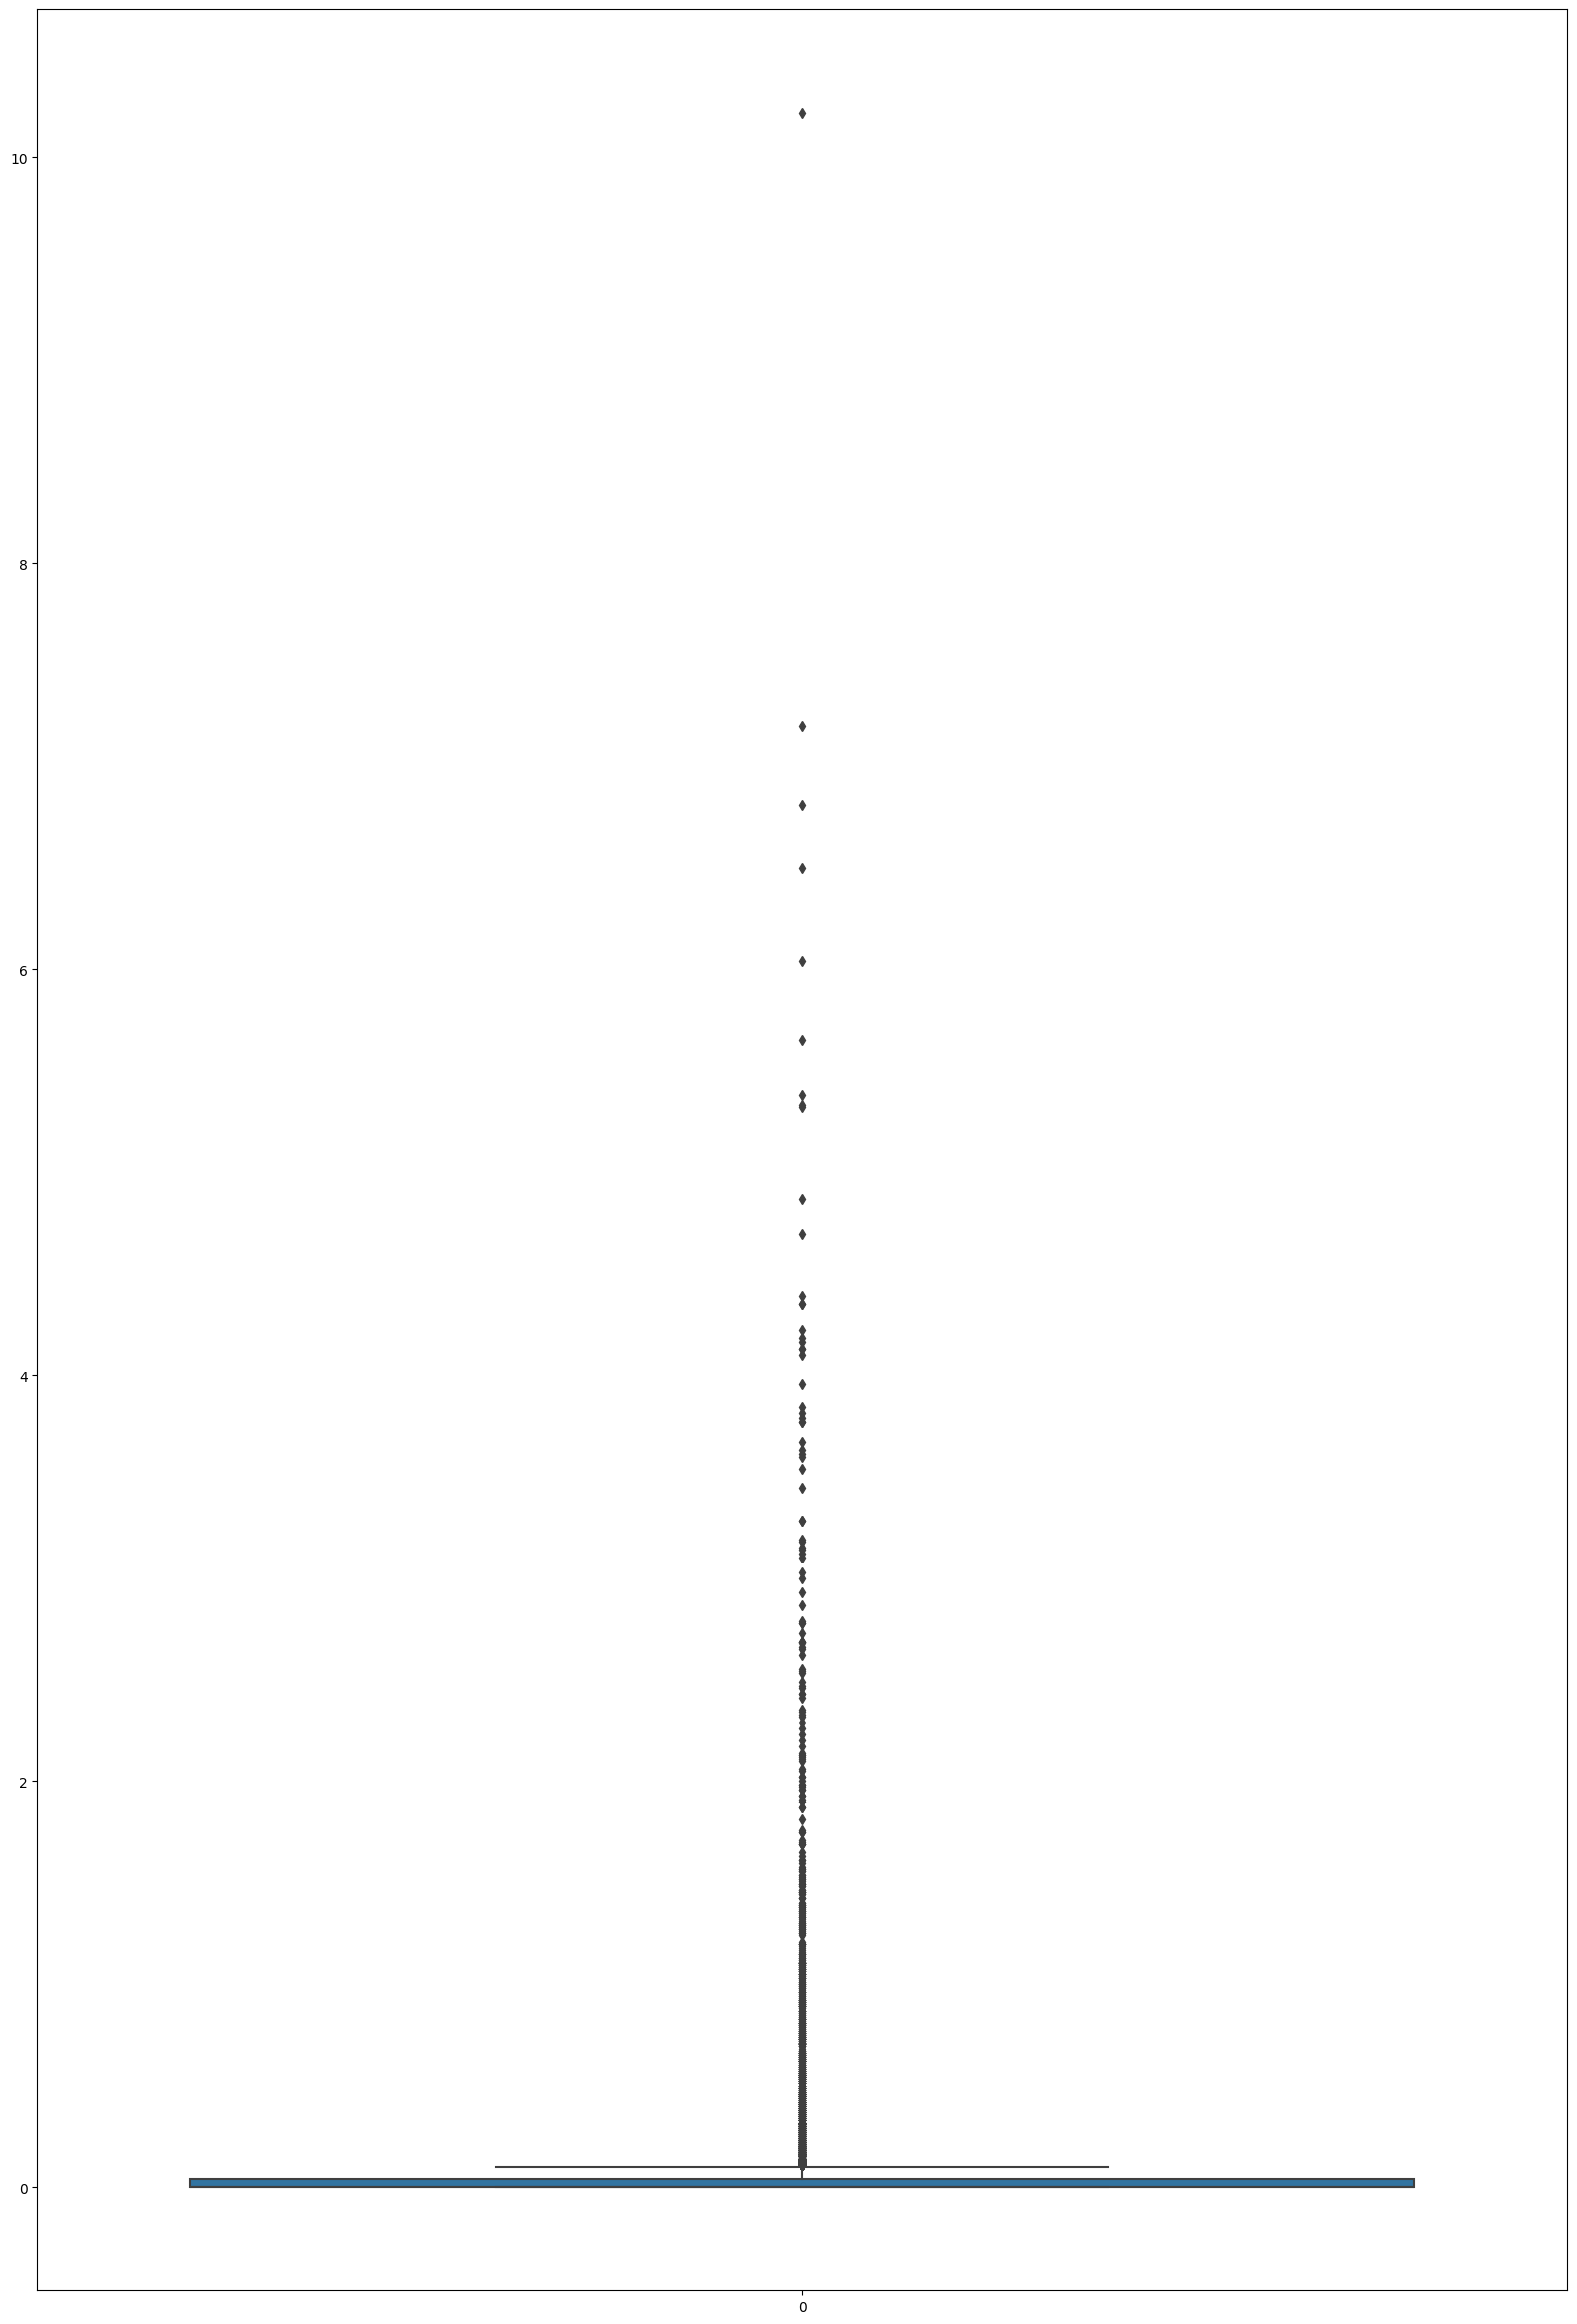

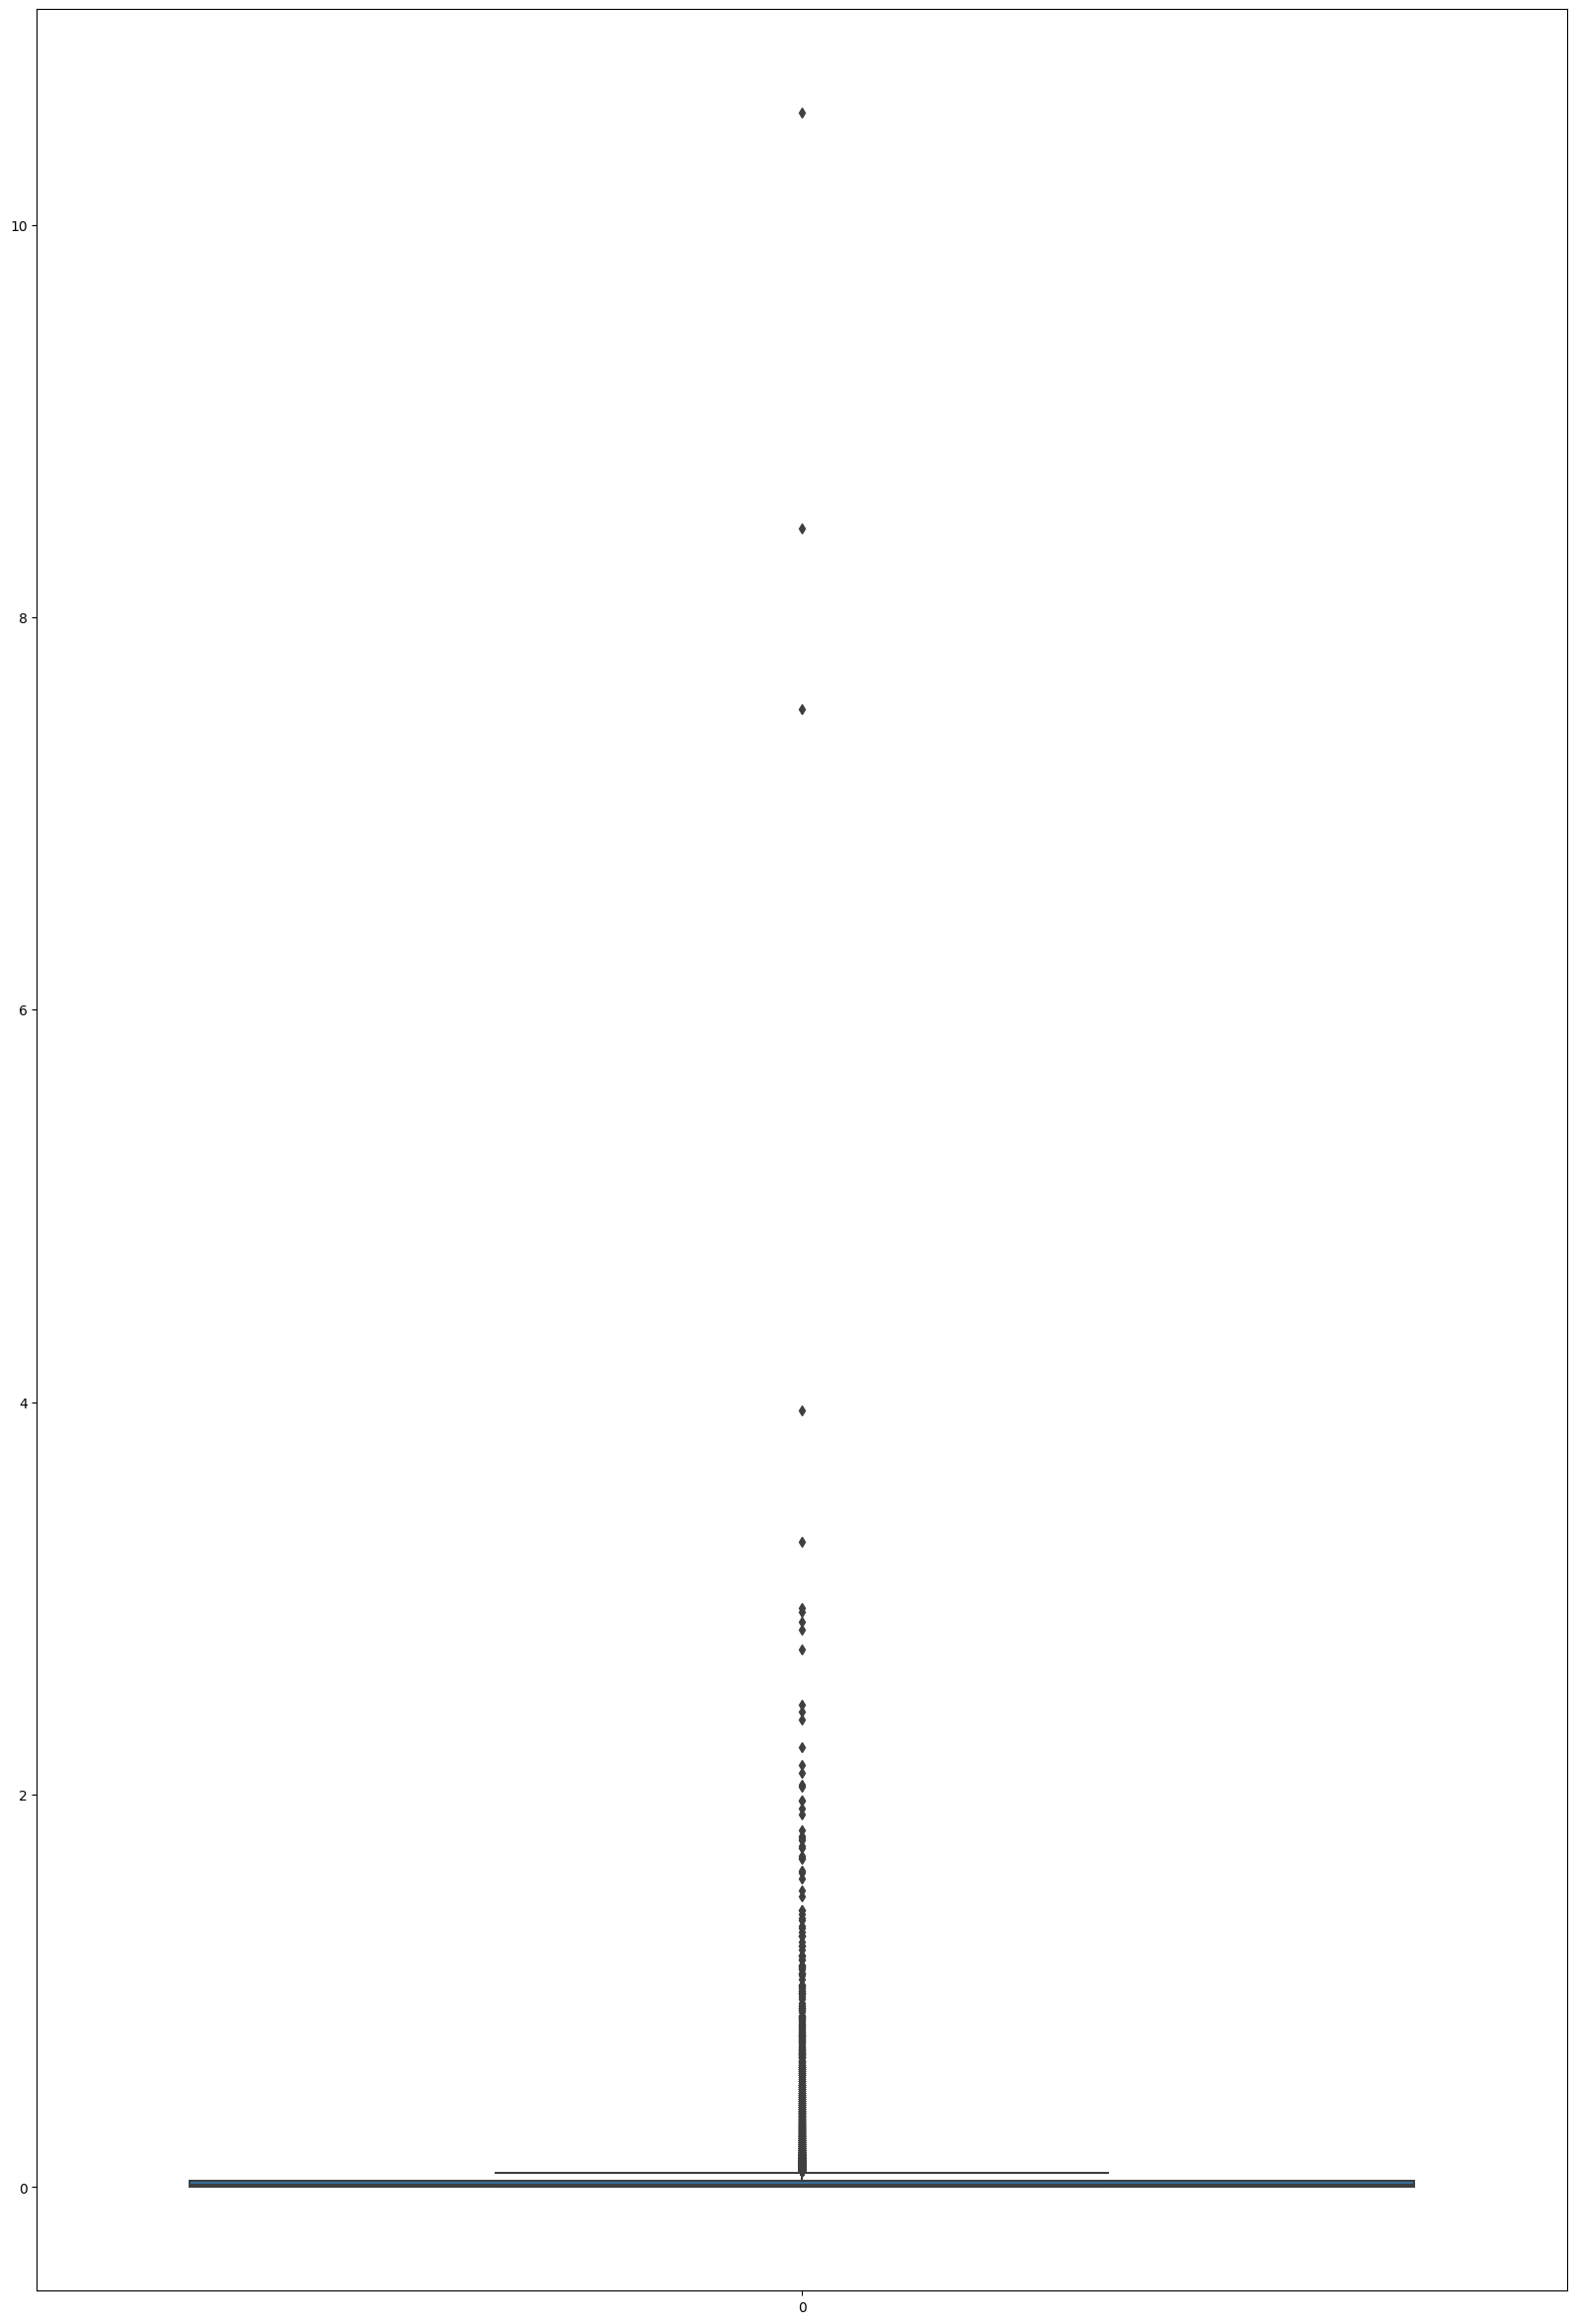

In [63]:
graphics = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for g in graphics:
    plt.figure(figsize=(20,30))
    sns.boxplot(data[g])
    plt.show()

Выбросы указывают на наличие хитов в данном исследование сохраним их для полной оценки. Для более подробной оценки нужно проводить дополнительное исследование или обращаться к экспертам.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16524 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16524 non-null  object 
 1   platform         16524 non-null  object 
 2   year_of_release  16524 non-null  int16  
 3   genre            16524 non-null  object 
 4   na_sales         16524 non-null  float64
 5   eu_sales         16524 non-null  float64
 6   jp_sales         16524 non-null  float64
 7   other_sales      16524 non-null  float64
 8   critic_score     8049 non-null   float64
 9   user_score       7517 non-null   float64
 10  rating           16524 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.9+ MB


Было удалено менее 10% данных.

Cуммируем продажи во всех регионах и записываем их в отдельный столбец.

In [38]:
data['all_sales'] = data.loc[:,'na_sales':'other_sales'].sum(axis=1)

In [39]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод:** Привели название столбцов в корректный вид. Преобразовали данные в нужный тип. Проверили данные на дубликаты. Избавились от пропусков и аномалий, потеряв при этом меньше 10% данных. Добавили новый столбец с суммой всех продаж во всех регионах.

## Исследовательский анализ данных

Изучим сколько игр выпускалось в разные годы.

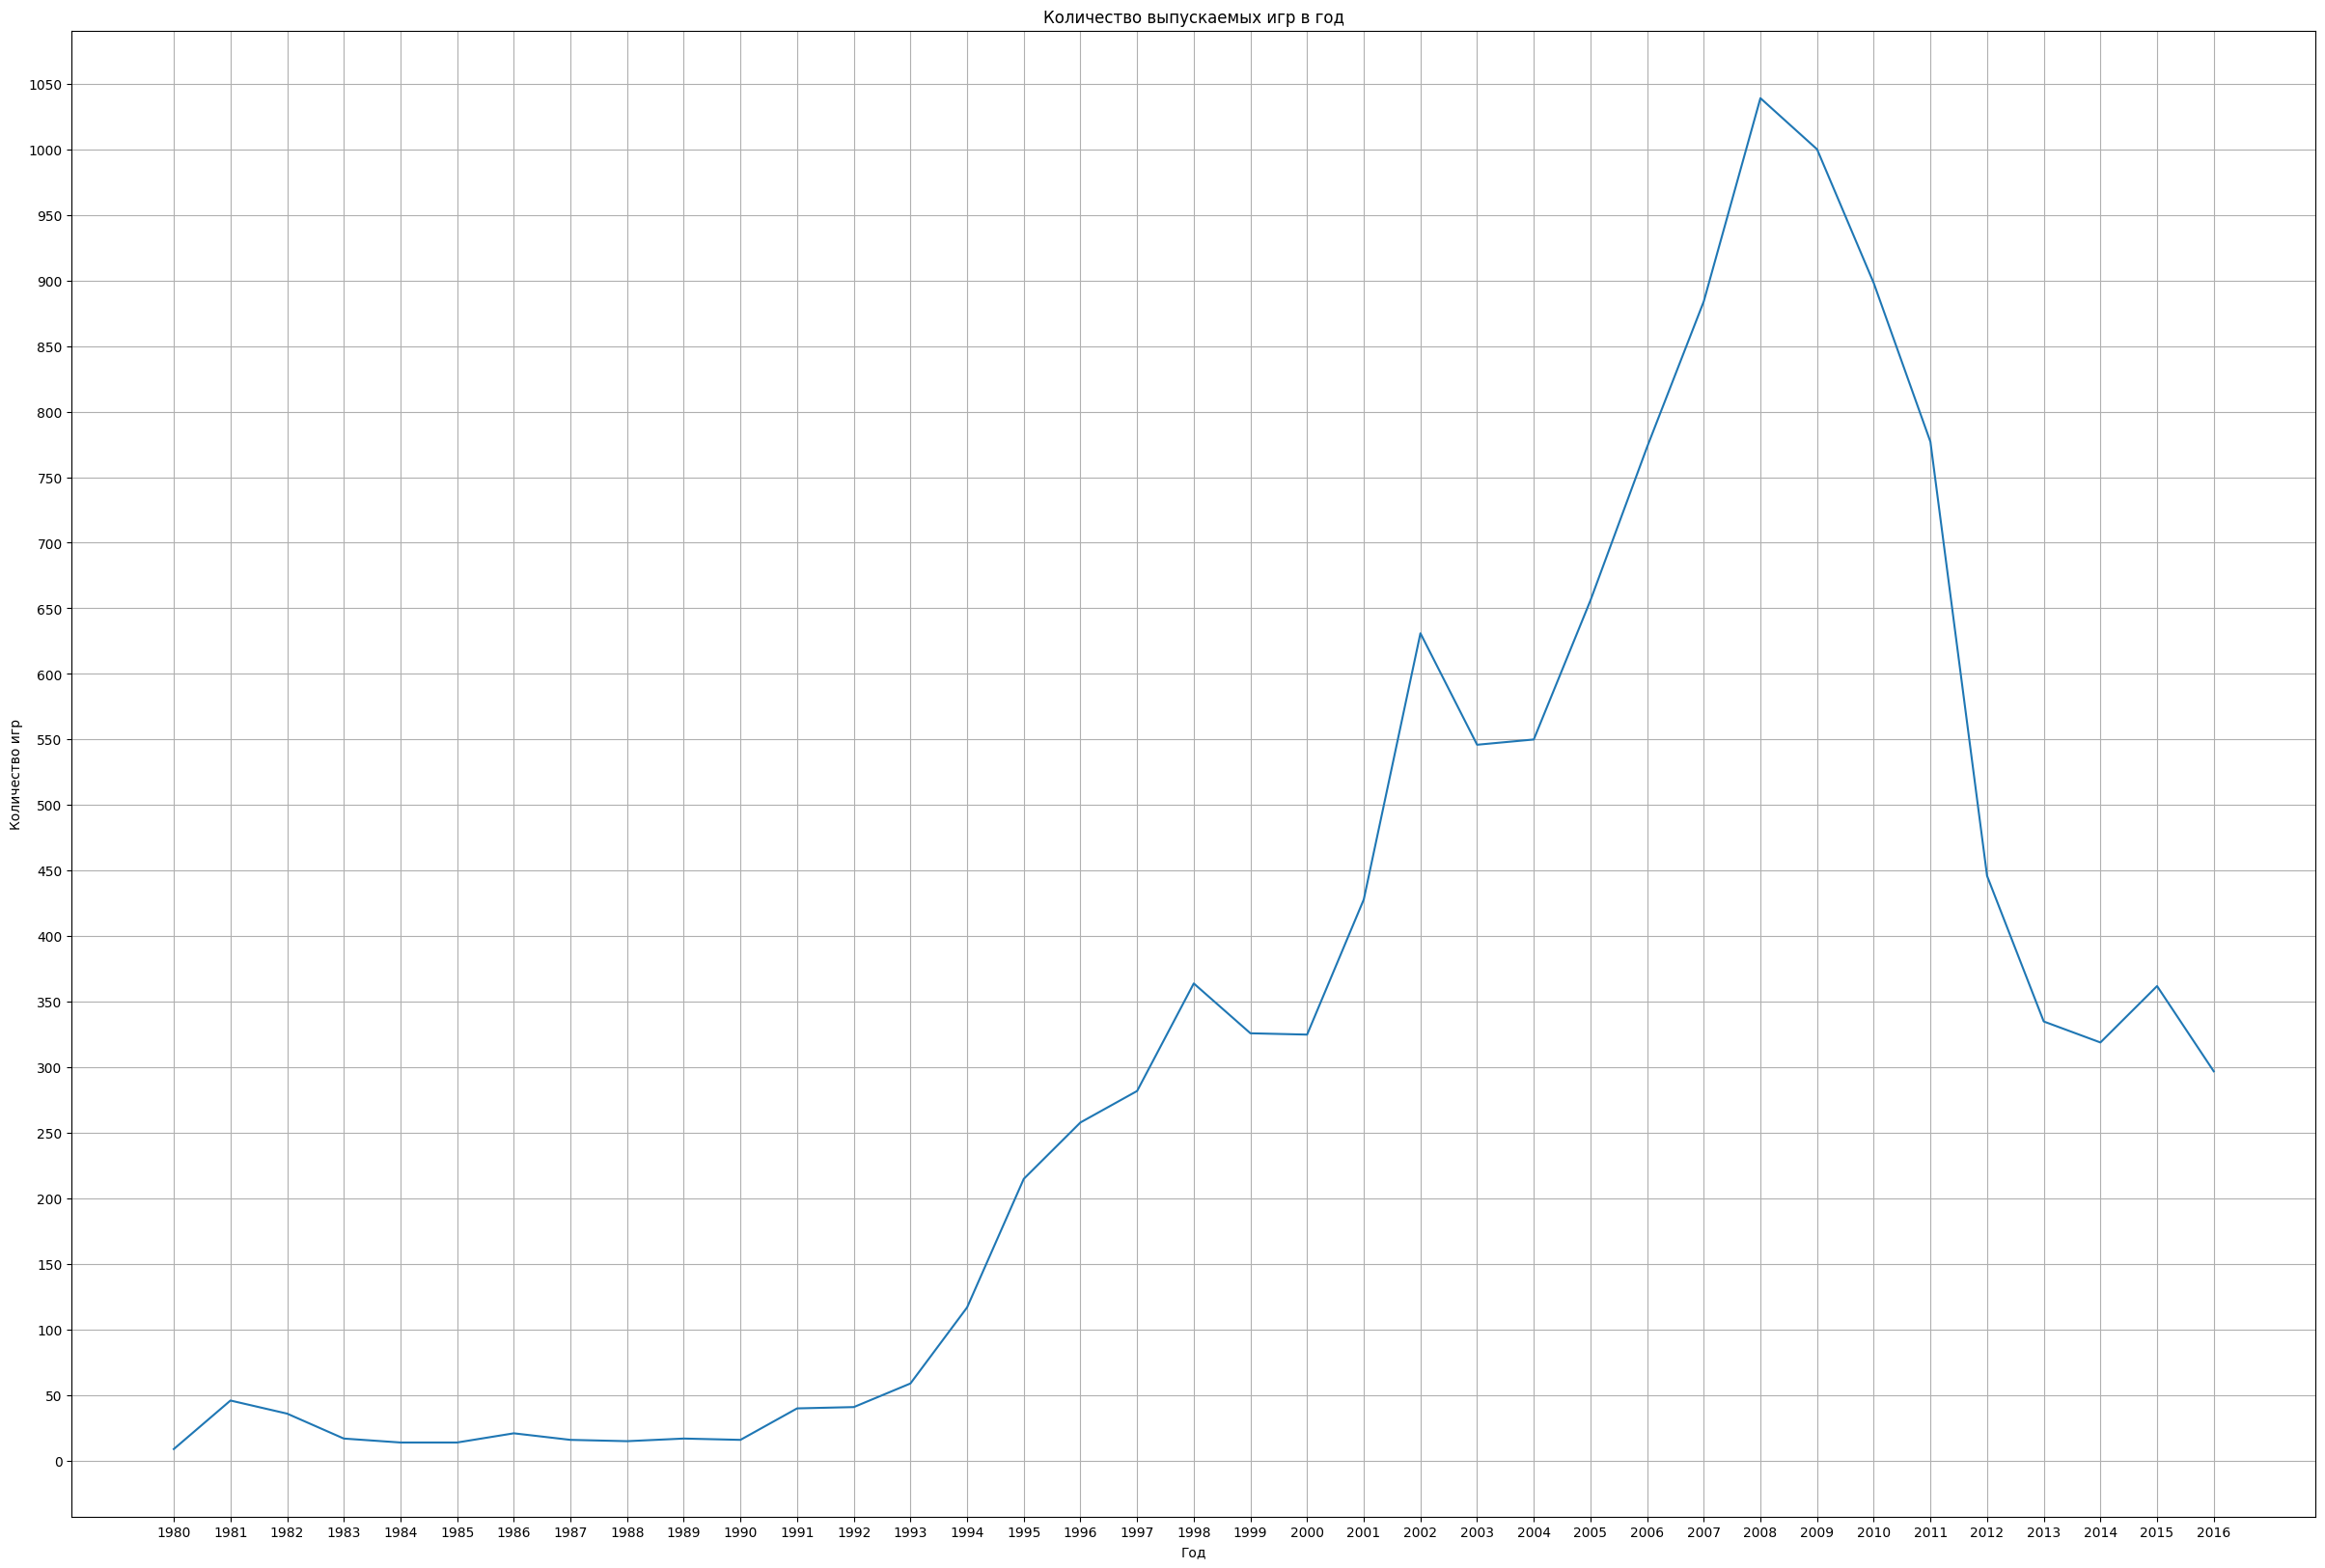

In [40]:
#избовляюсь от дубликатов связанными с выходом на разных платформах
    
games_by_year = data.drop_duplicates(subset=['year_of_release','name'])

plt.figure(figsize=(30, 20))
plt.plot(games_by_year.groupby('year_of_release')['name'].count())
plt.title('Количество выпускаемых игр в год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid()
plt.xticks(np.arange(1980, 2017, 1))
plt.yticks(np.arange(0, 1100, 50))
plt.show()

Из графика можно сделать вывод, что с 1993 года был рост количества выпускаемых игр. Застой с 2002 по 2004. Рост до 2008. Резкое падение с 2009 по 2013 и последующий незначительный рост. Падение в 2016 связано с неполнотой данных. Из данного графика я вижу общую динамику. Могу предположить, что после пиков идет смена поколений , а большой спад связан с выходом на рынок нового игрока не указанного в исследовании например мобильный гейминг или кризис в целом.

Изучим как менялись продажи по платформам.

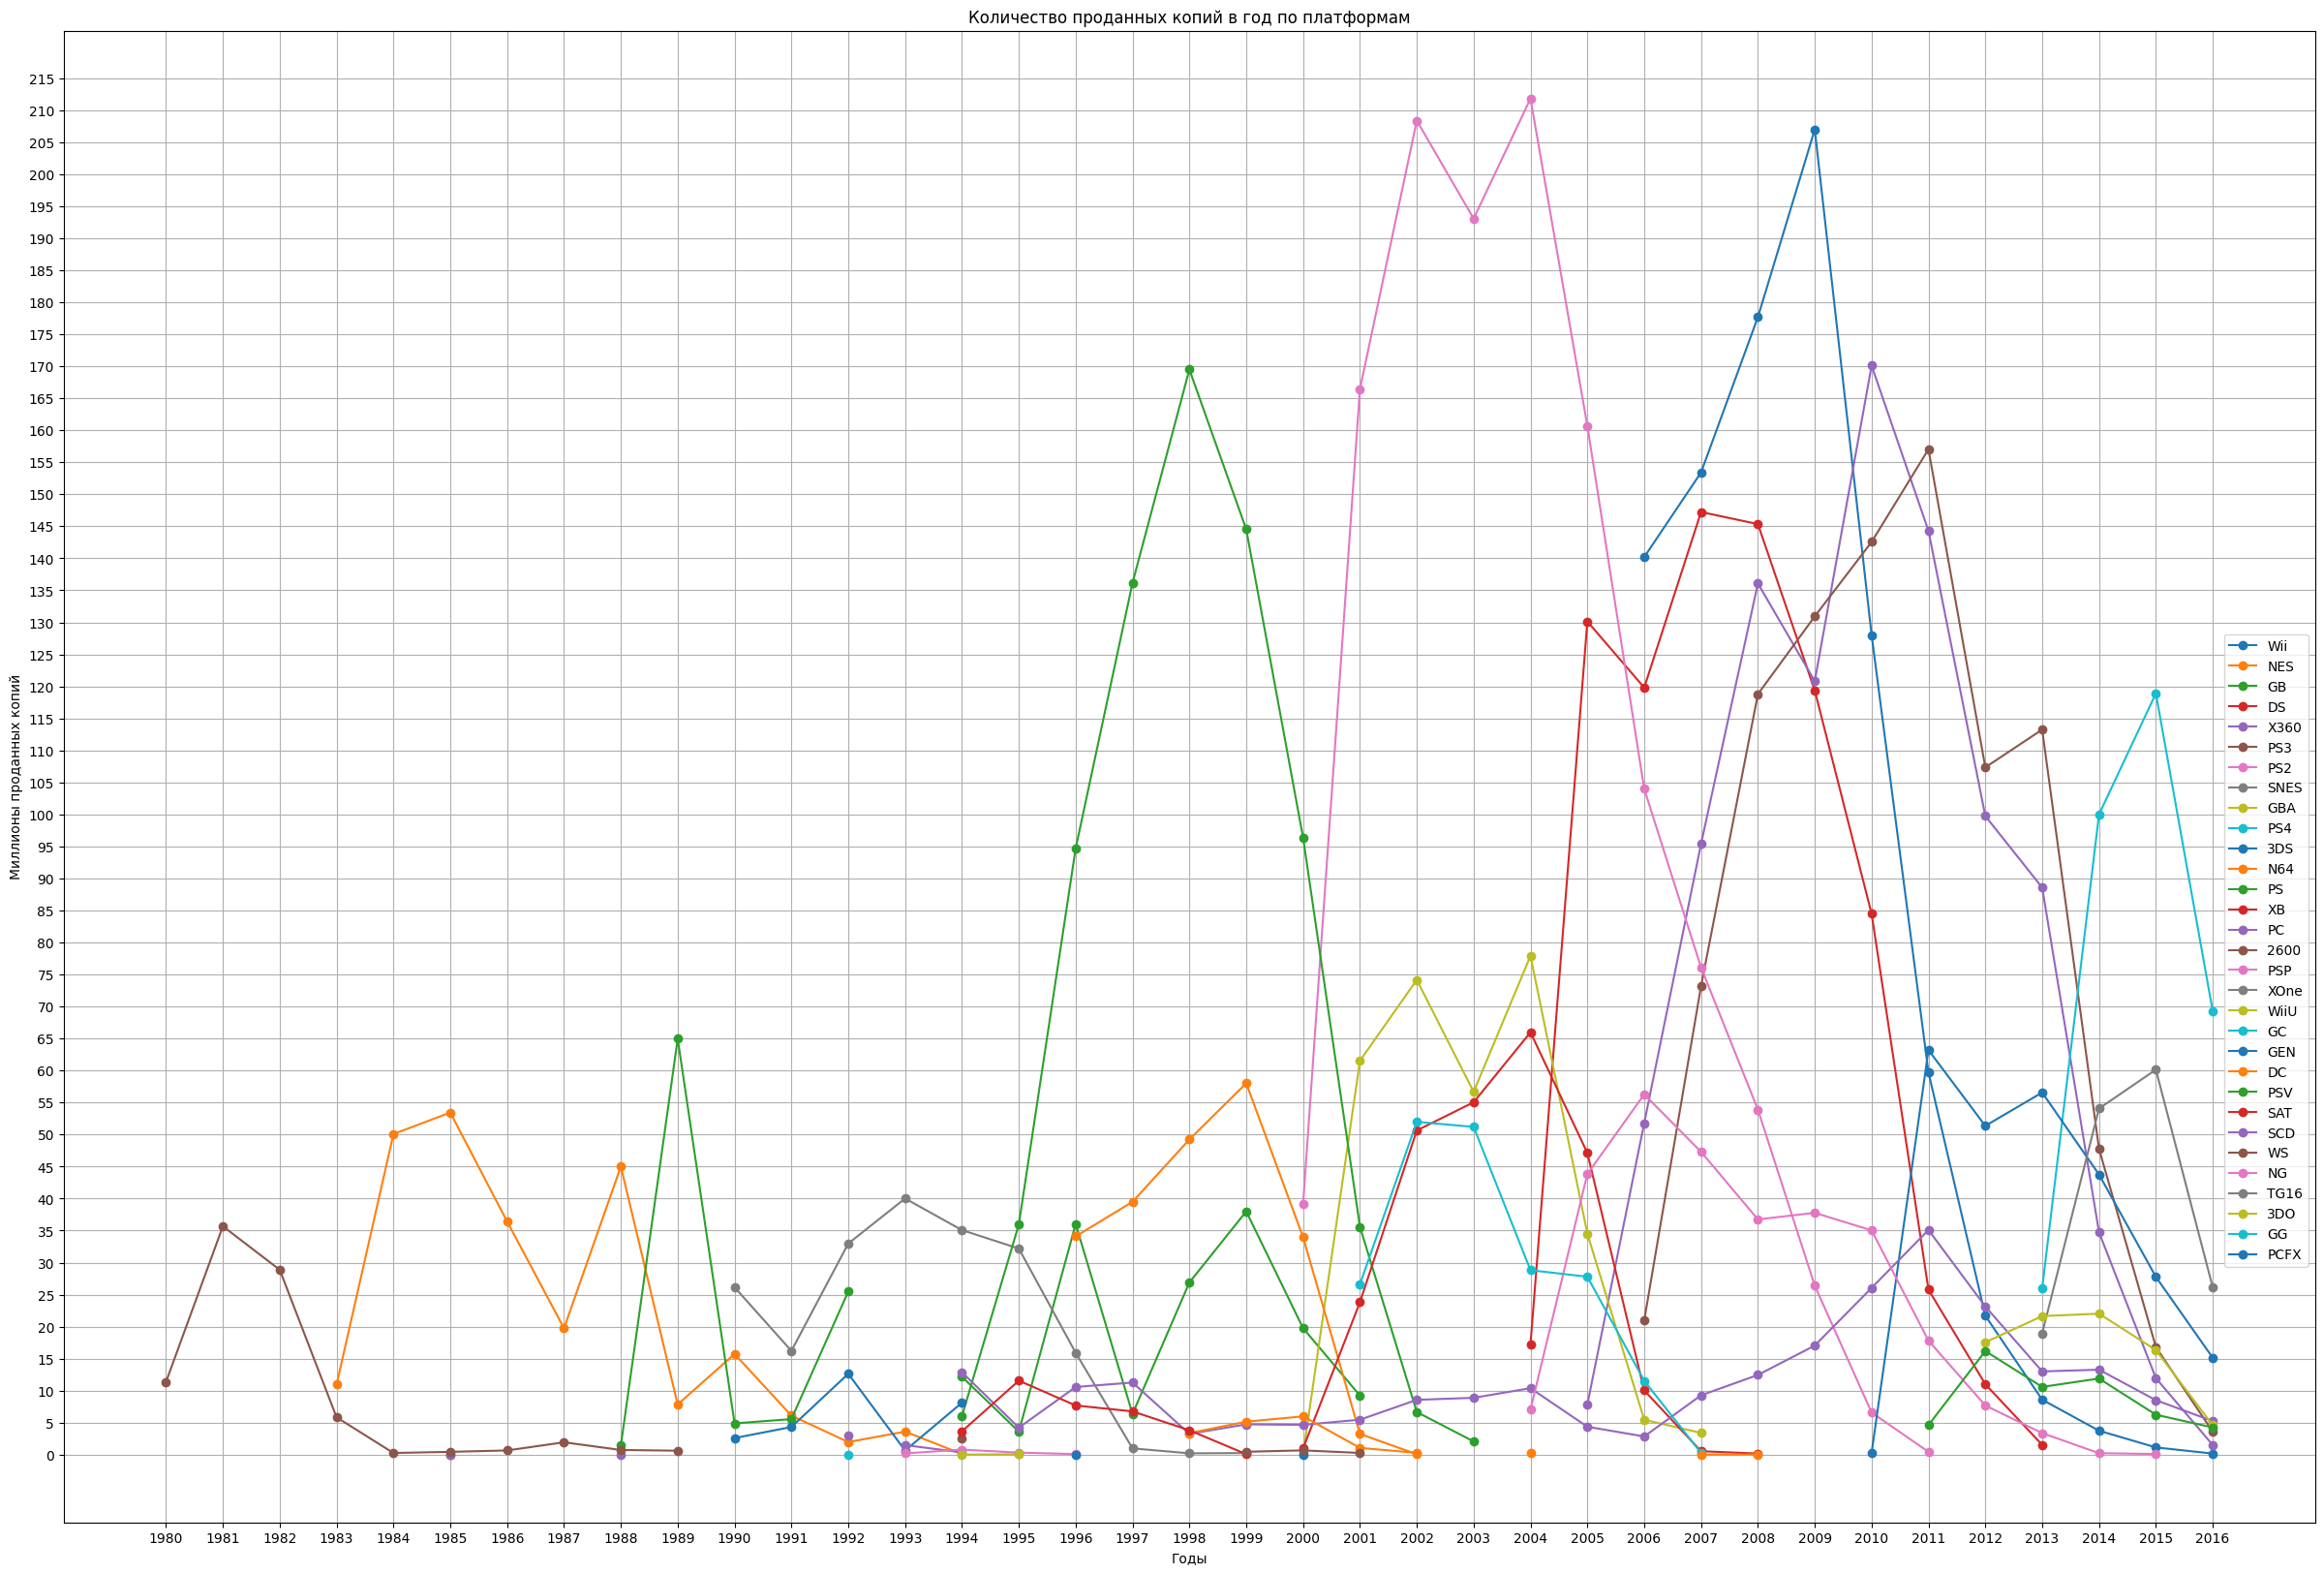

In [41]:
play = []
for l in data['platform'].unique():
    play.append(l)
    
platform_sales = data.pivot_table(index='platform', values = 'all_sales', columns='year_of_release', aggfunc='sum').T

plt.figure(figsize=(30, 20))
for p in play:
    plt.plot(platform_sales[p], marker ='o', label=p)
plt.title('Количество проданных копий в год по платформам')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')
plt.grid()
plt.legend(bbox_to_anchor=(1,0.6))
plt.xticks(np.arange(1980, 2017, 1))
plt.yticks(np.arange(0, 220, 5))
plt.show()

Из графика видно, что платформы имеют свой жененный цикл и модельную сменяемость. Выделяется PC эта платформа не имеет высоких продаж, но относительно стабильна на всем изучаемом отрезке.

Выберем платформы с наибольшими суммарными продажами. Соcтавим TOP10.

In [42]:
platform_sales_top = data.pivot_table(index='platform', values = 'all_sales',aggfunc='sum')
platform_top = platform_sales_top.sort_values(by='all_sales', ascending=False).head(10)
platform_top

,all_sales
platform,
PS2,1246.92
X360,962.88
PS3,932.24
Wii,901.34
DS,801.98
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.30


В TOP10 вошли 4 представителя PS. На данный момент лидирующую позицию занимает PS2, обогнав даже следующие поколение.

Построим распределение по годам.

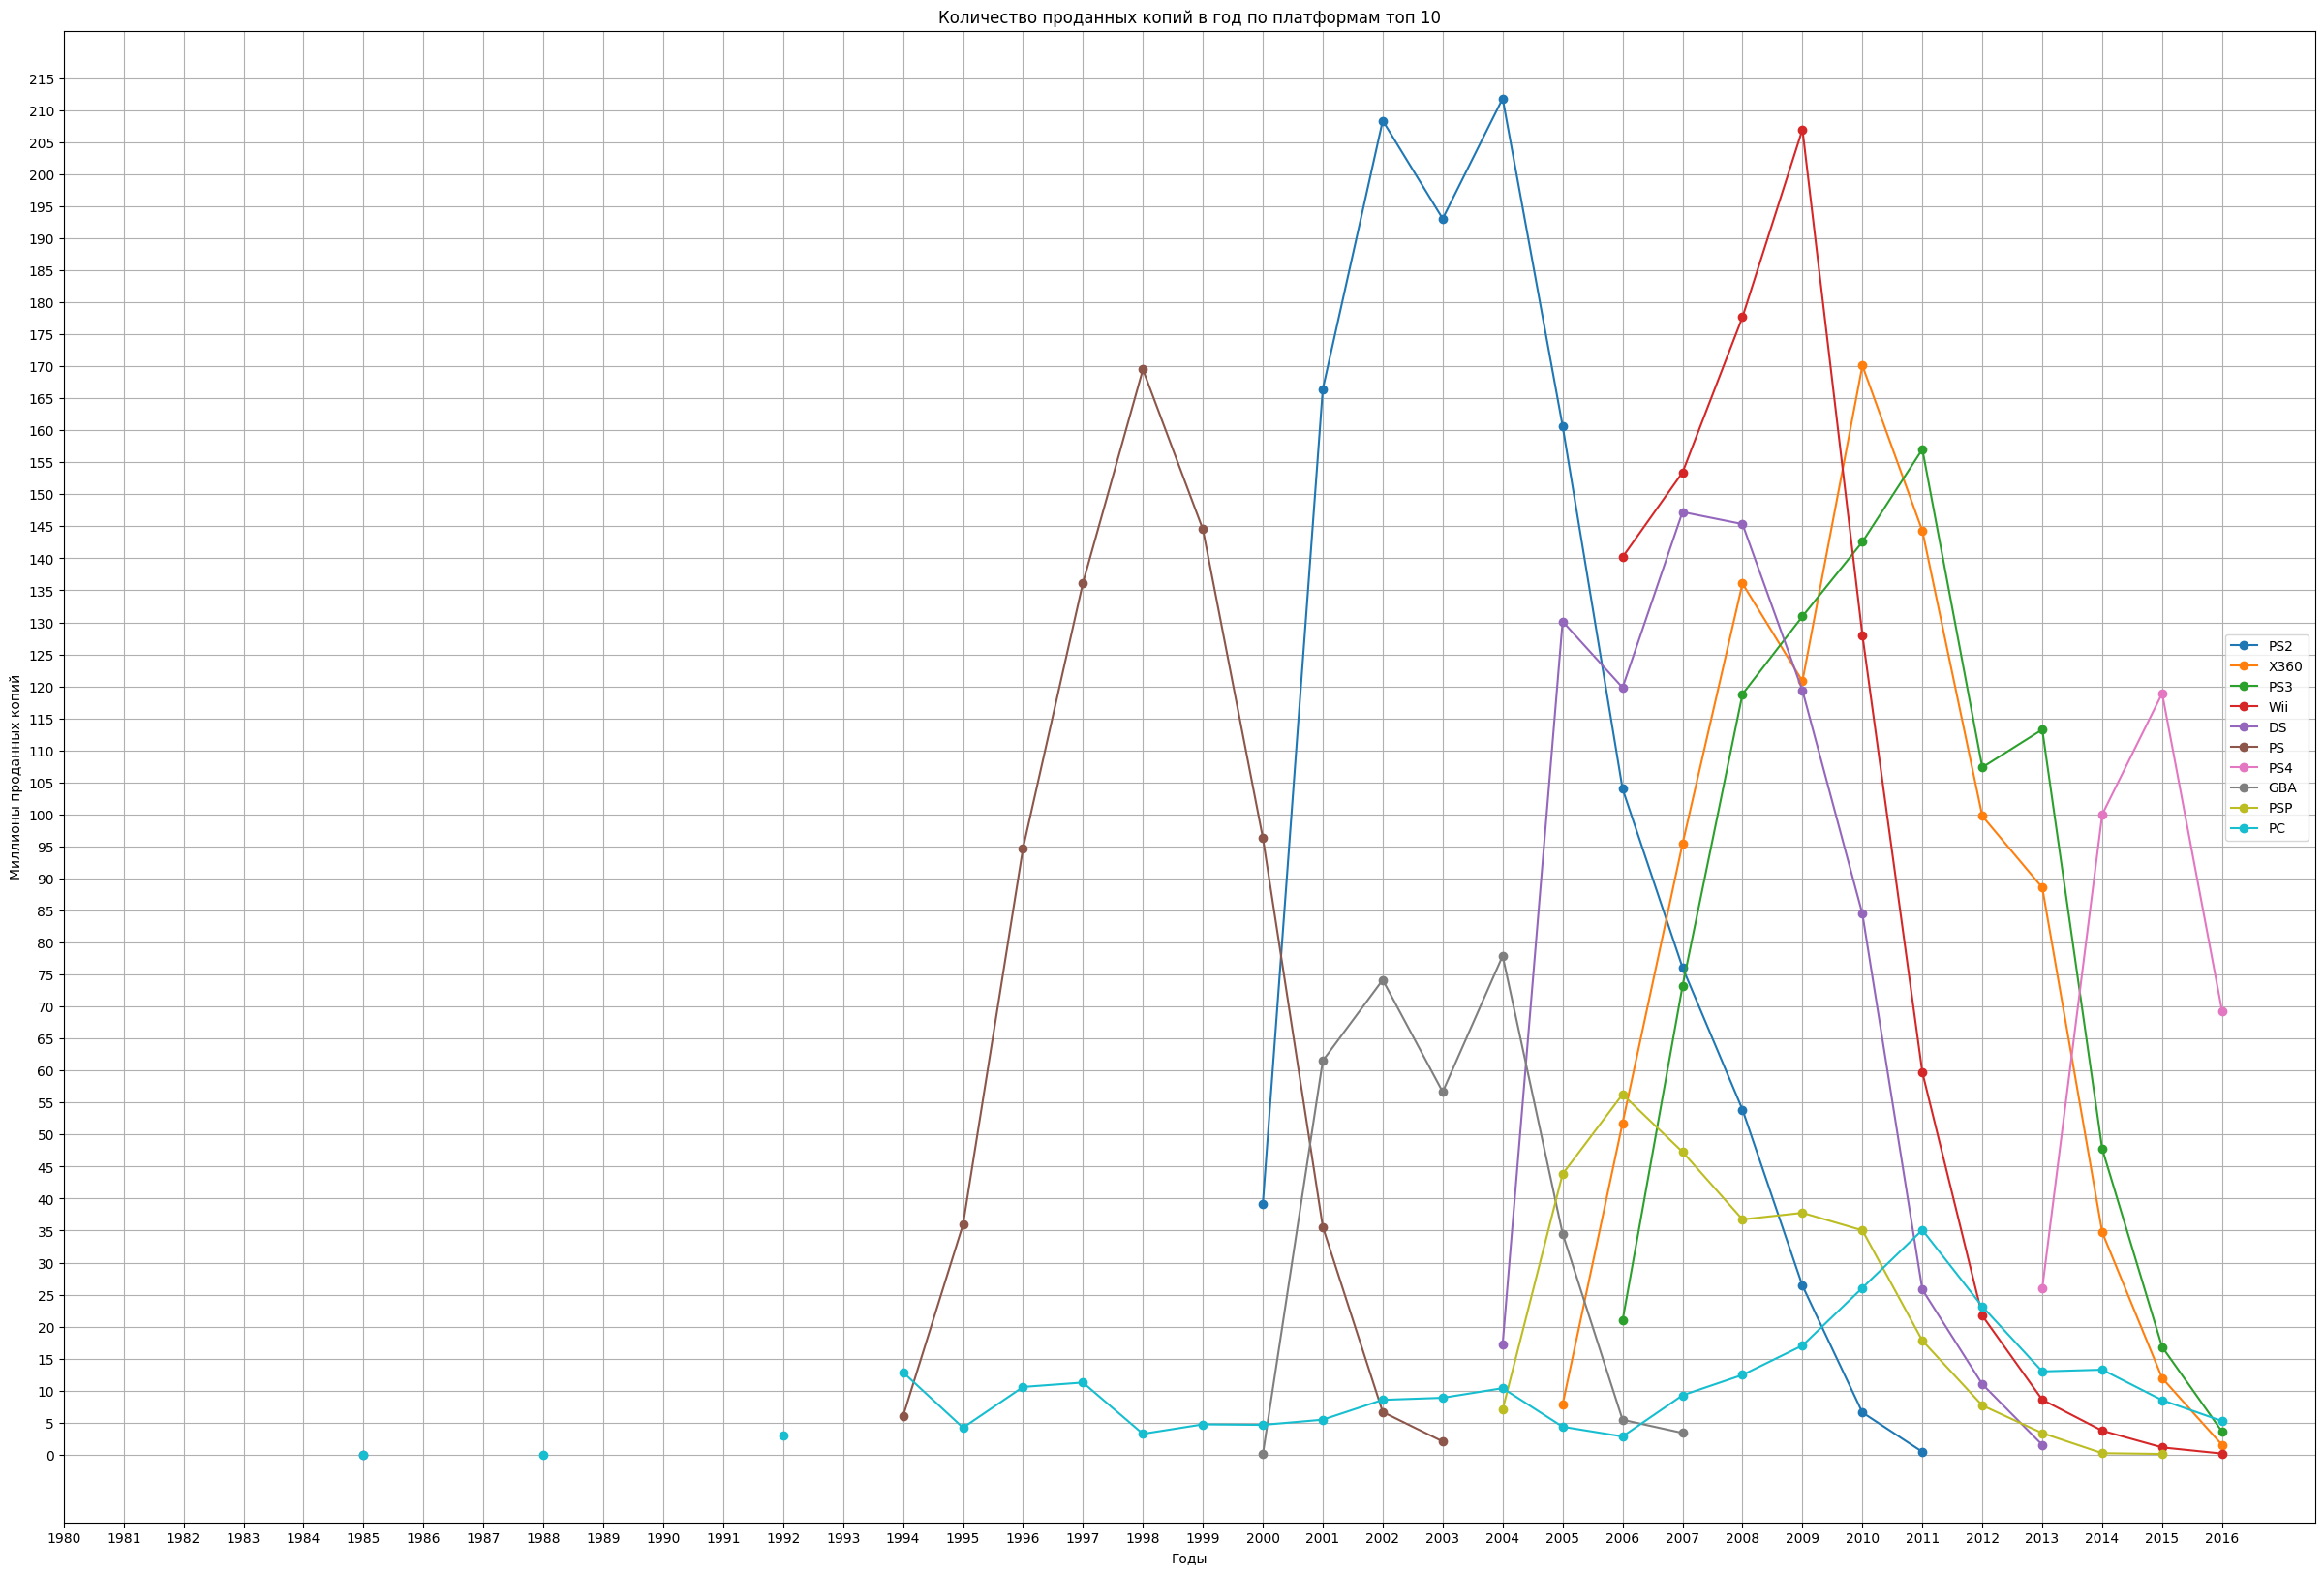

In [43]:
play_top = platform_top.index

plt.figure(figsize=(30, 20))
for p in play_top:
    plt.plot(platform_sales[p], marker ='o', label=p)
plt.title('Количество проданных копий в год по платформам топ 10')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')
plt.grid()
plt.legend(bbox_to_anchor=(1,0.6))
plt.xticks(np.arange(1980, 2017, 1))
plt.yticks(np.arange(0, 220, 5))
plt.show()

На основе этих платформ TOP10 вычислим период сменяемости.

In [44]:
periudes = (data
            .query("platform in  @play_top")
            .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
            .reset_index()
            )
periudes.columns = ['platform', 'first_year', 'last_year']
periudes['duration'] = periudes['last_year'] - periudes['first_year']
periudes

,platform,first_year,last_year,duration
0,DS,1985,2013,28
1,GBA,2000,2007,7
2,PC,1985,2016,31
3,PS,1994,2003,9
4,PS2,2000,2011,11
5,PS3,2006,2016,10
6,PS4,2013,2016,3
7,PSP,2004,2015,11
8,Wii,2006,2016,10
9,X360,2005,2016,11


In [45]:
periudes['duration'].describe()

count    10.000000
mean     13.100000
std       9.011721
min       3.000000
25%       9.250000
50%      10.500000
75%      11.000000
max      31.000000
Name: duration, dtype: float64

Жизненный цик платформы составляет ~ 9 лет.

Определим актуальный период в  5 лет. На этом участке уже можно заметить спад, подъем, зарождение и угасание платформ.

Ограничим используемые данные 2011 годом и в дальнейшем будем использовать их.

In [46]:
actual_data = data.query("year_of_release > 2011")

Изучим какие платформы из актуального периода лидируют по продажам, растут или падают.

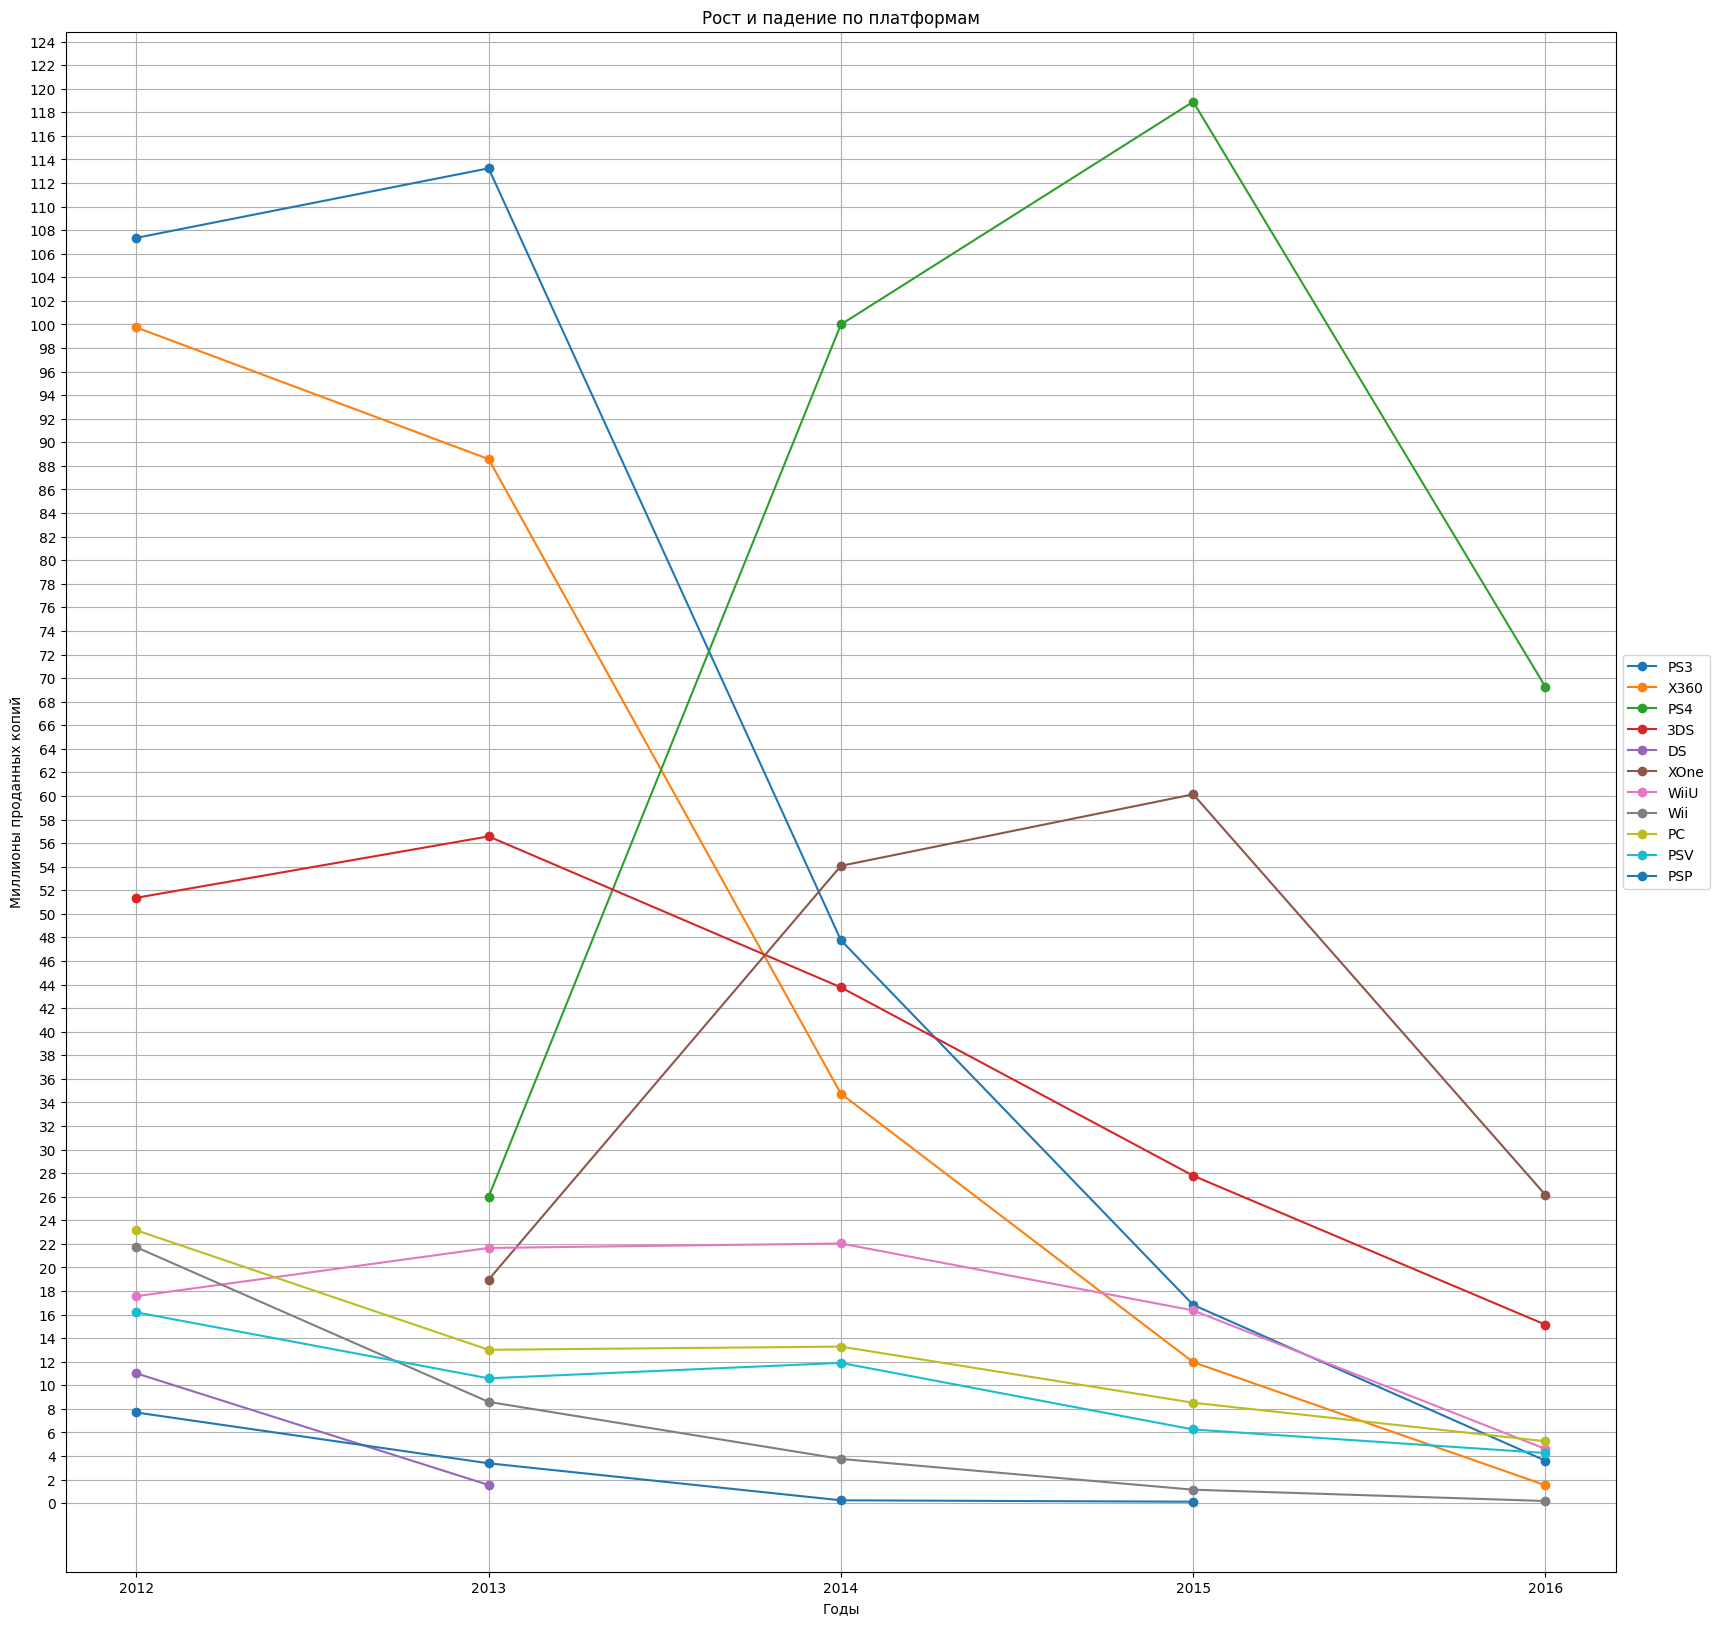

In [47]:
rise_decline = (actual_data
                .pivot_table(index='platform', values = 'all_sales', columns='year_of_release', aggfunc='sum')
                .T)

opponents = []
for o in data.query('year_of_release > 2011')['platform'].unique():
    opponents.append(o)
    
plt.figure(figsize=(20, 20))
for p in opponents:
    plt.plot(rise_decline[p], marker ='o', label=p)
plt.title('Рост и падение по платформам')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')
plt.grid()
plt.legend(bbox_to_anchor=(1,0.6))
plt.xticks(np.arange(2012, 2017, 1))
plt.yticks(np.arange(0, 125, 2))
plt.show()

На данном графике видно, что XOne и PS4 имеют резкий рост. У WiiU и 3DS имели небольшой подъем в продажах относительно всех остальных. Также в список включим PC так как он актуален во все года.

In [48]:
actual_platform = ['XOne', 'PS4', 'WiiU', '3DS', 'PC']

Изучим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

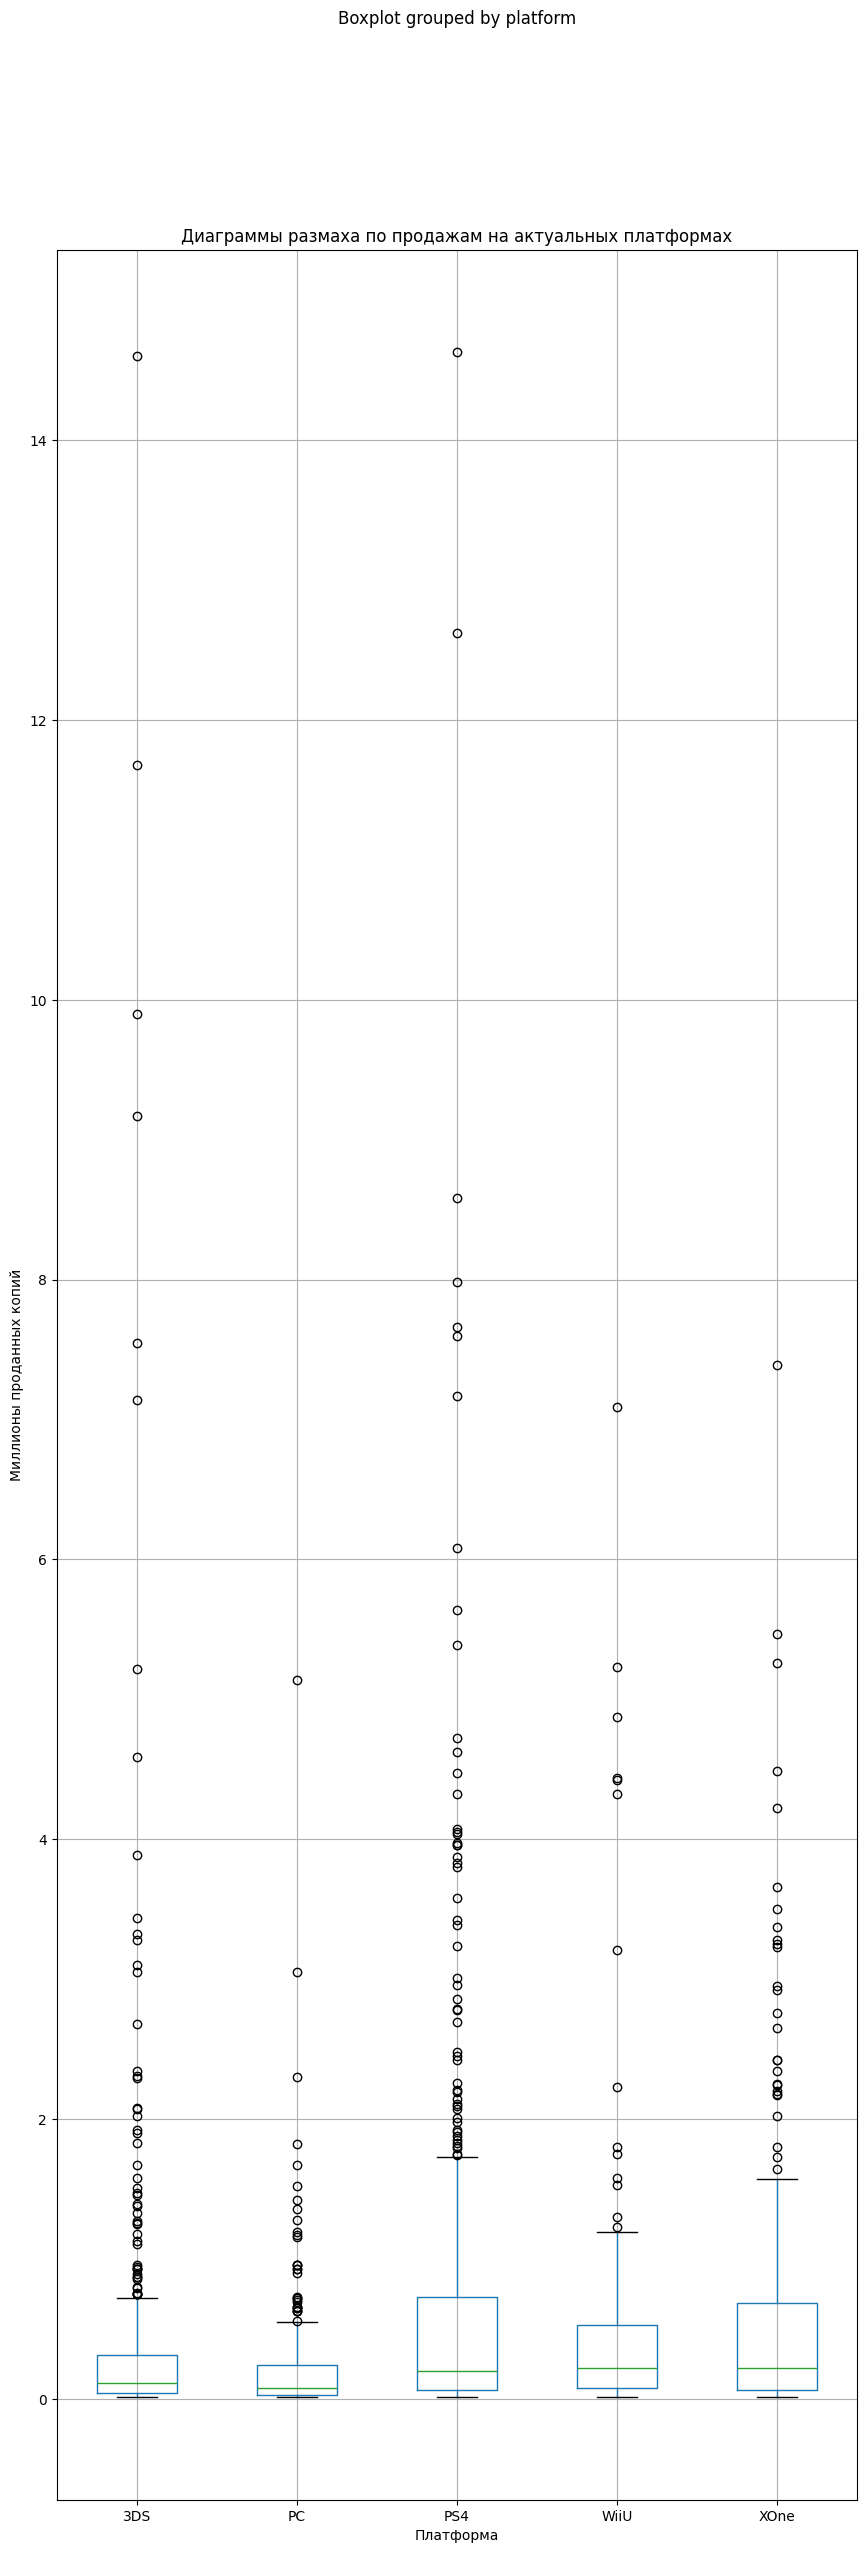

In [49]:
(actual_data
 .query("platform in @actual_platform")
 .boxplot(column='all_sales', by='platform', figsize=(10,30))
)
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.show()

По всем платформам существуют выбросы. Выбросы могут быть следствием того, что игра может быть более востребована или лучше оптимизирована на одной платформе чем на другой. Также у платформы могут быть эксклюзивы. Самая стабильная и не популярная в этом плане PC. У PS4 самая большая доля хитов.  У XOne самый большой размах говорит от том, что хитов меньше, но разнообразие продаваемых игр больше. 3DS похоже большую часть продаж имеет за счет хитов.

Изучим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Корреляция 0.4065679020617816


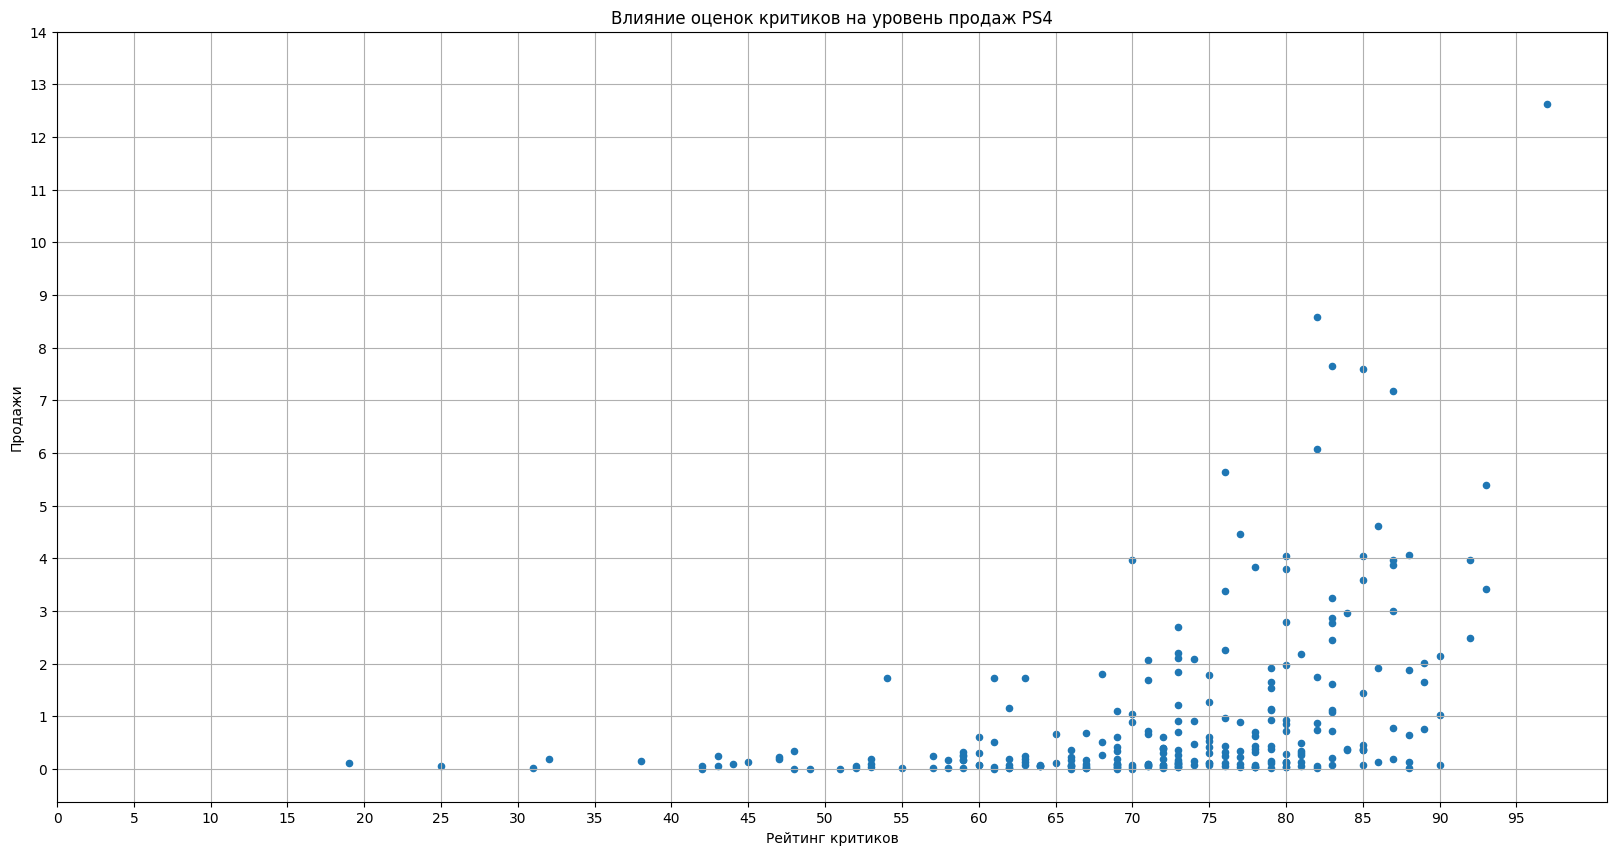

In [50]:
(actual_data
.query('platform == "PS4"')
.plot(
x='critic_score',
y='all_sales',
kind='scatter',
alpha=1,
figsize=(20, 10),
grid=True)
)
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 15, 1))
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж PS4')
print('Корреляция', actual_data.query('platform == "PS4"')['all_sales']
      .corr(actual_data.query('platform == "PS4"')['critic_score']))

Корреляция -0.03195711020455643


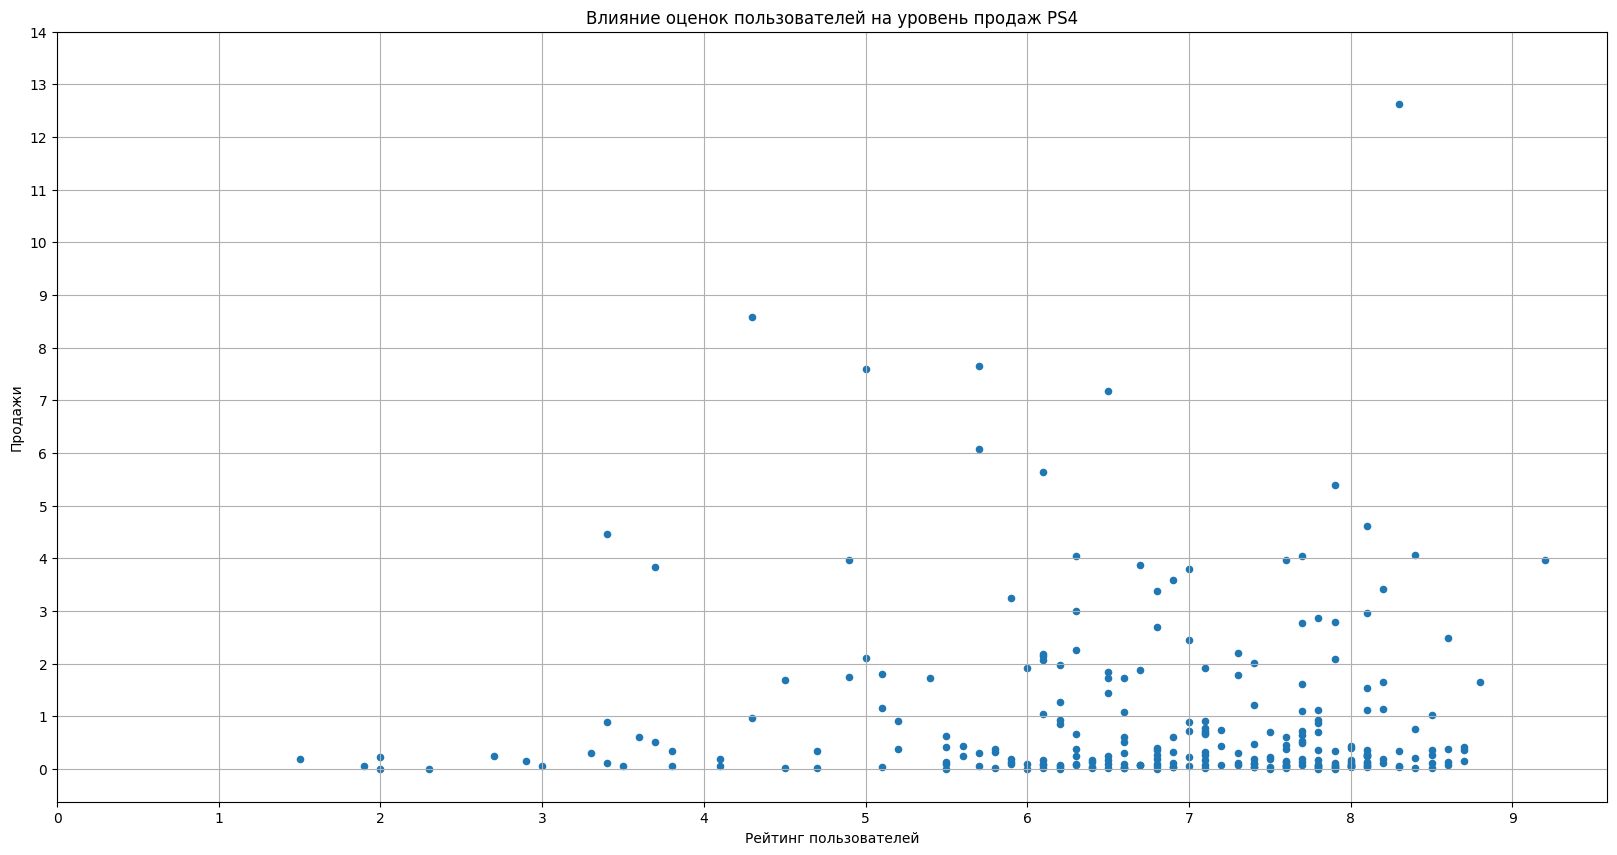

In [51]:
(actual_data
.query('platform == "PS4"')
.plot(
x='user_score',
y='all_sales',
kind='scatter',
alpha=1,
figsize=(20, 10),
grid=True)
)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 15, 1))
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж PS4')
print('Корреляция', actual_data.query('platform == "PS4"')['all_sales']
      .corr(actual_data.query('platform == "PS4"')['user_score']))

In [52]:
actual_platform_comparison = ['XOne', 'WiiU', '3DS', 'PC']

In [53]:
print('Влияние оценок критиков на уровень продаж остальных платформ')
for a in actual_platform_comparison :
    print(a, actual_data.query("platform == @a")['all_sales'].corr(actual_data.query("platform == @a")['critic_score']))

Влияние оценок критиков на уровень продаж остальных платформ
XOne 0.41699832800840164
WiiU 0.3483797601201749
3DS 0.32080286953607845
PC 0.24237963276968702


In [54]:
print('Влияние оценок пользователей на уровень продаж остальных платформ')
for a in actual_platform_comparison:
    print(a, actual_data.query("platform == @a")['all_sales'].corr(actual_data.query("platform == @a")['user_score']))

Влияние оценок пользователей на уровень продаж остальных платформ
XOne -0.06892505328279415
WiiU 0.4002190202148617
3DS 0.19758263411038596
PC -0.11839320425104324


У XOne нет связи. У PC связь противоположная при росте оценок продажи падают. У WiiU и 3DS есть связь между ростом оценок и увеличением оценки пользователей.

Изучим общее распределение игр и количеством проданных копий по жанрам.

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


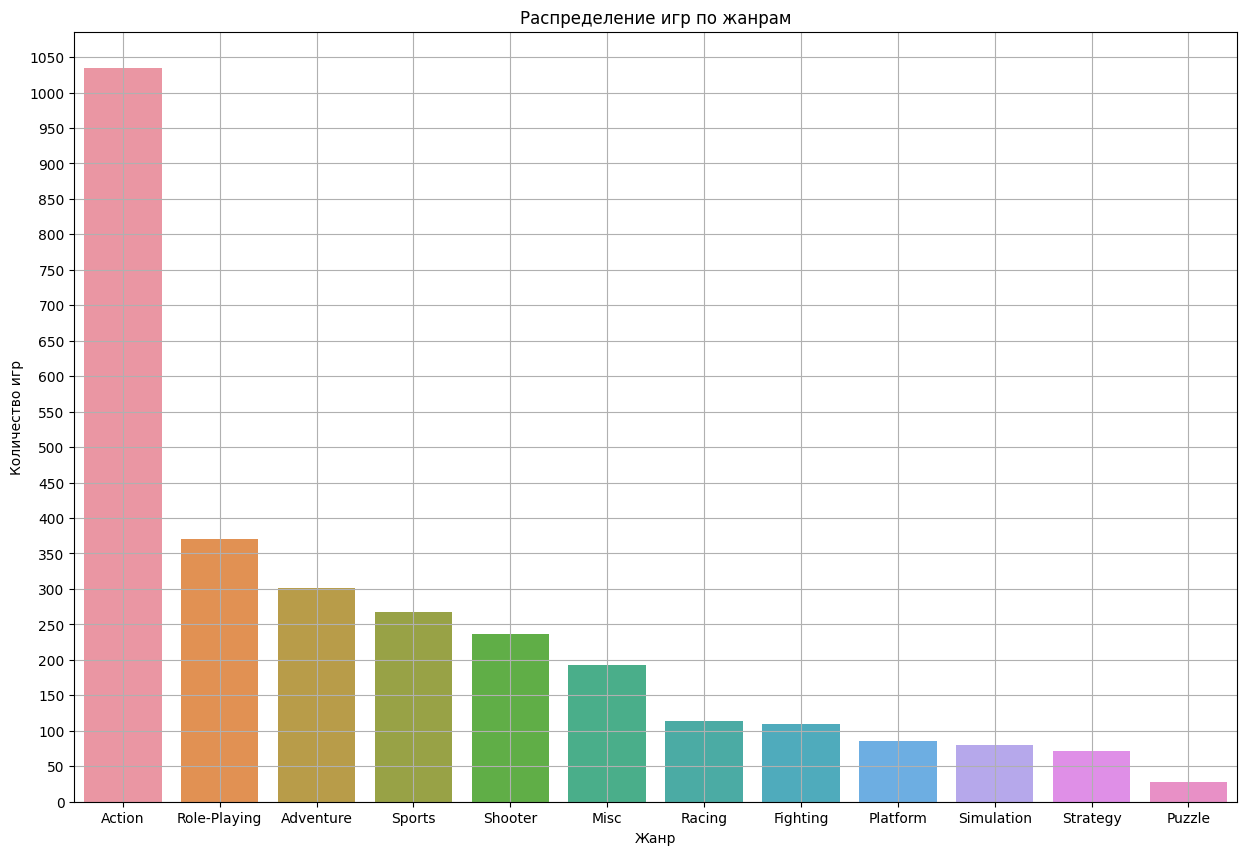

In [55]:
plt.figure(figsize=(15, 10))
plt.yticks(np.arange(0, 1200, 50))
game_genres = actual_data.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False)
(sns.barplot(data = game_genres, x = game_genres.index, y = 'name'))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.grid()
plt.show()

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


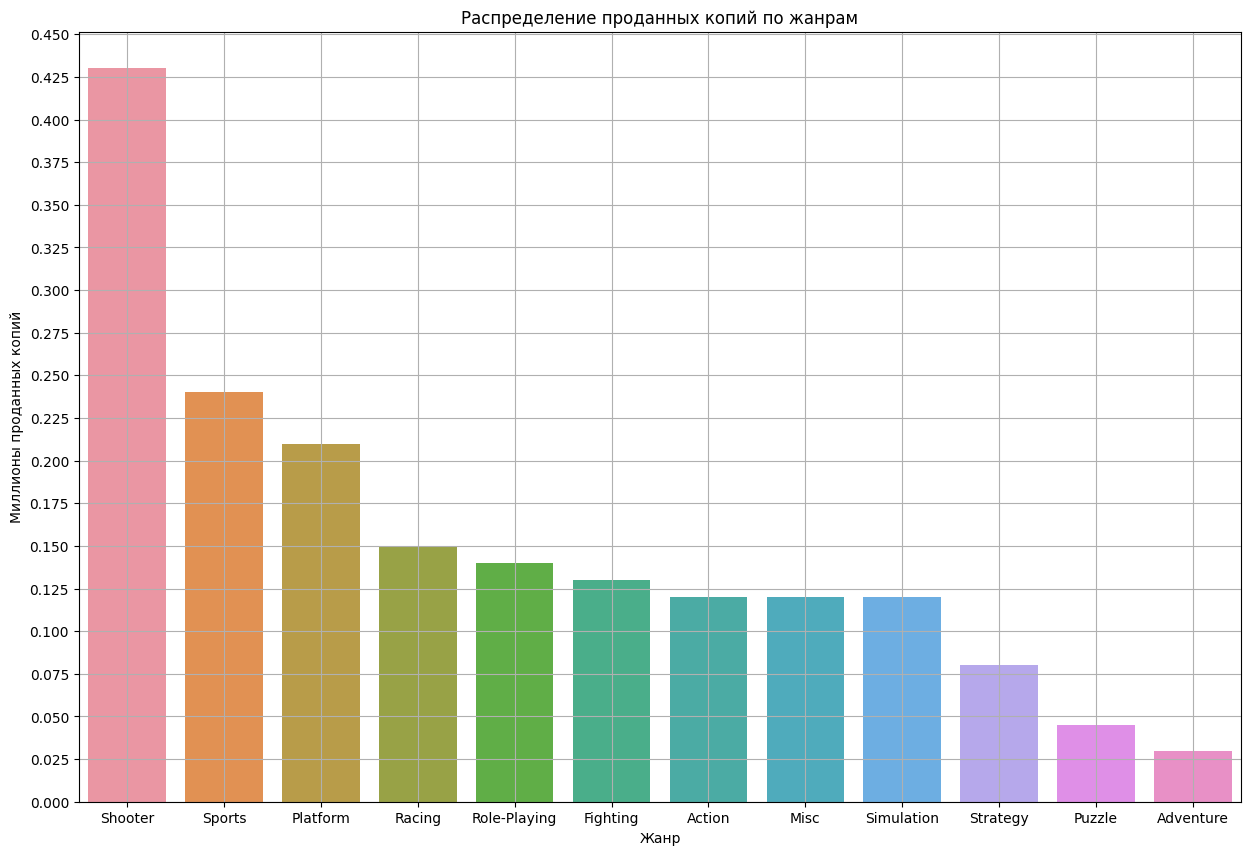

In [56]:
plt.figure(figsize=(15, 10))
plt.yticks(np.arange(0, 0.5, 0.025))
sales_genres = (actual_data.pivot_table(index='genre', values='all_sales', aggfunc='median')
                .sort_values('all_sales', ascending=False))
(sns.barplot(data = sales_genres, x = sales_genres.index, y = 'all_sales'))
plt.title('Распределение проданных копий по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.grid()
plt.show()

Самое лучше соотношение у платформеров, хуже всего у приключений. Дальше выпускаемое количество игр определенного жанра не соответствует продажам. Только Simulation, Strategy и Puzzle как не популярны в производстве, так и не пользуются спросом.

## Составление портрета пользователя каждого региона

Самые популярные платформы (топ-5).

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


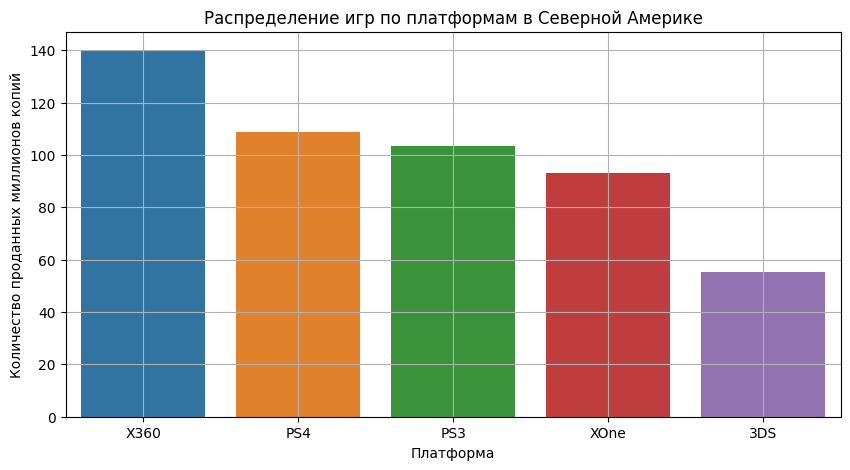

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


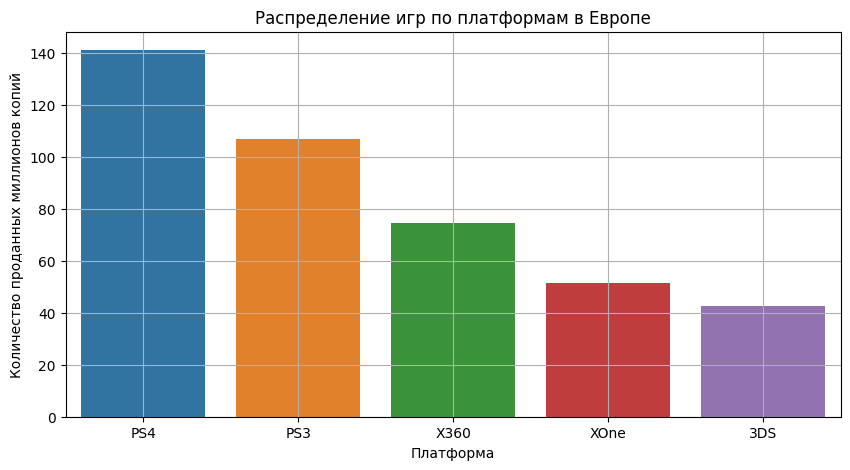

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


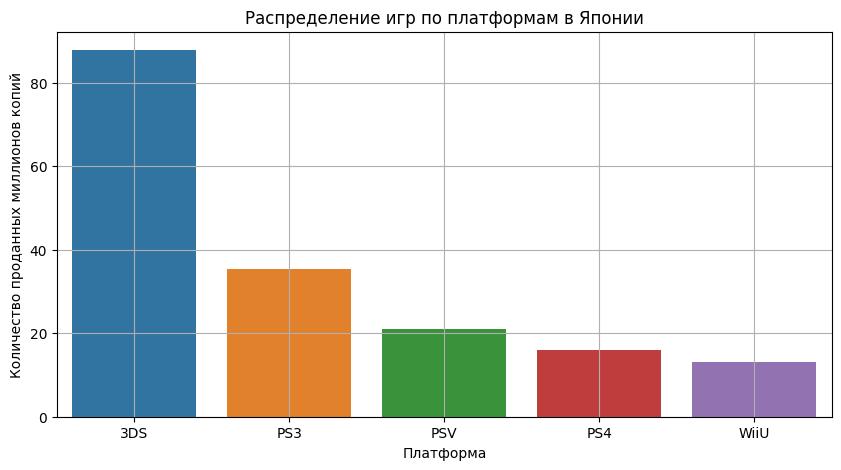

In [57]:
#создаем список регионов

regions = {
    'na_sales':'Северной Америке',
    'eu_sales':'Европе',
    'jp_sales':'Японии'
}
for r,a in regions.items():
    plt.figure(figsize=(10, 5))
    platform_regions = actual_data.pivot_table(index='platform', values= r, aggfunc='sum').sort_values(r, ascending=False).head()
    sns.barplot(data = platform_regions, x = platform_regions.index, y = r)
    plt.title(f'Распределение игр по платформам в {a}')
    plt.xlabel('Платформа')
    plt.ylabel('Количество проданных миллионов копий')
    plt.grid()
    plt.show()

В каждом регионе имеется свой лидер: Северна Америка - X360, Европа - PS4, Япония - 3DS. Втор место во всех регионах PS3. Третье и четвертое делят PS и XBOX разных версий. Пятое место в каждом регионе своё. Также доля продаж платформ на каждом рыке разная. Из этого можно сделать вывод, что самый большой рынок это Северна Америка, второе место Европ, третье Япония. Япония меньше Северной Америки почти в 2,5 раза.

Самые популярные жанры (топ-5).

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


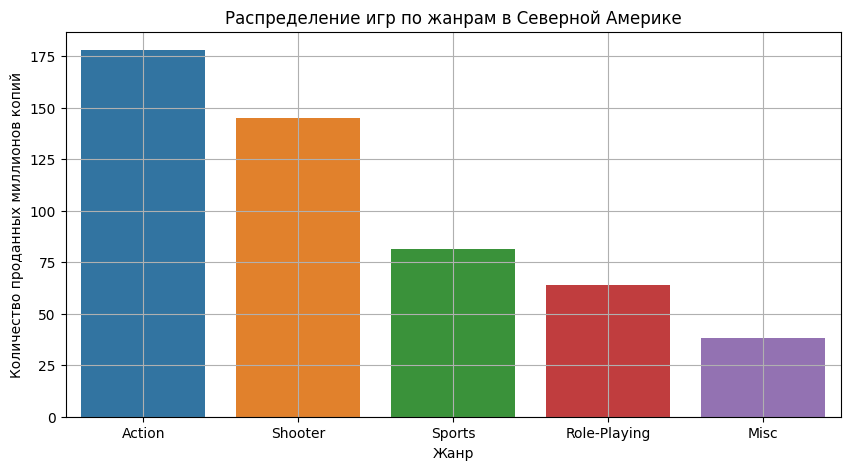

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


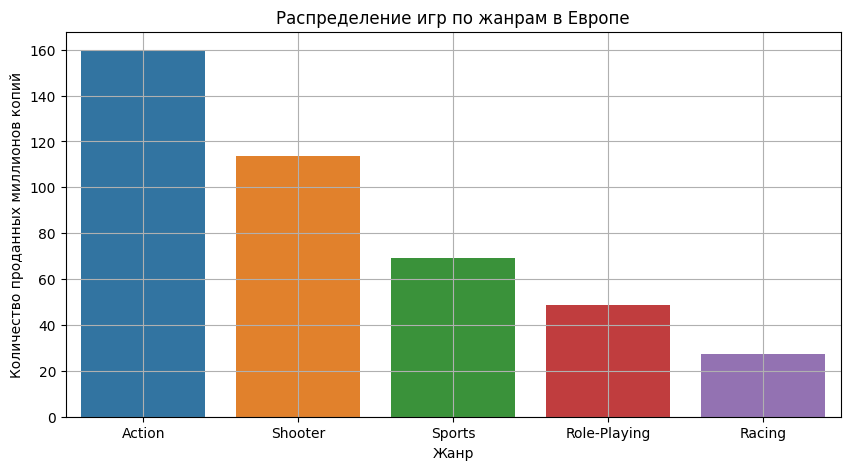

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


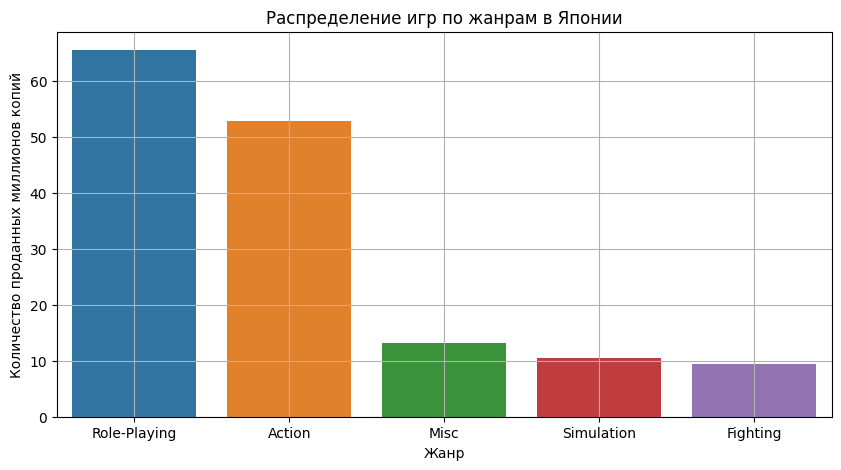

In [58]:
for r,a in regions.items():
    plt.figure(figsize=(10, 5))
    genres_regions = actual_data.pivot_table(index='genre', values= r, aggfunc='sum').sort_values(r, ascending=False).head()
    sns.barplot(data = genres_regions, x = genres_regions.index, y = r)
    plt.title(f'Распределение игр по жанрам в {a}')
    plt.xlabel('Жанр')
    plt.ylabel('Количество проданных миллионов копий')
    plt.grid()
    plt.show()

Везде лидирует Action. В Северной Америке и Европе на второе, третье и четвертое занимают одинаковые жанры: sport, shooter и role-playing, отличие только в пятом месте. От Северной Америке и Европе сильно отличается Япония role-playing там популярней sport, а на третьем месте вовсе misc.

Изучим влияние рейтинга ESRB на продажи в отдельном регионе

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


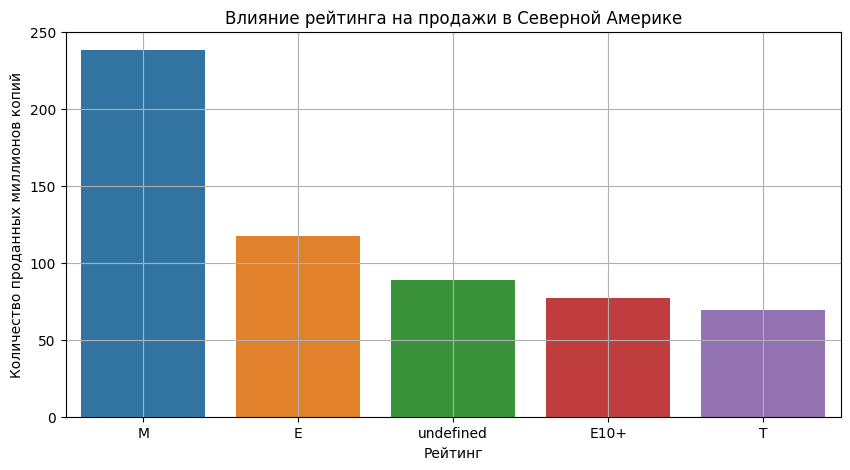

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


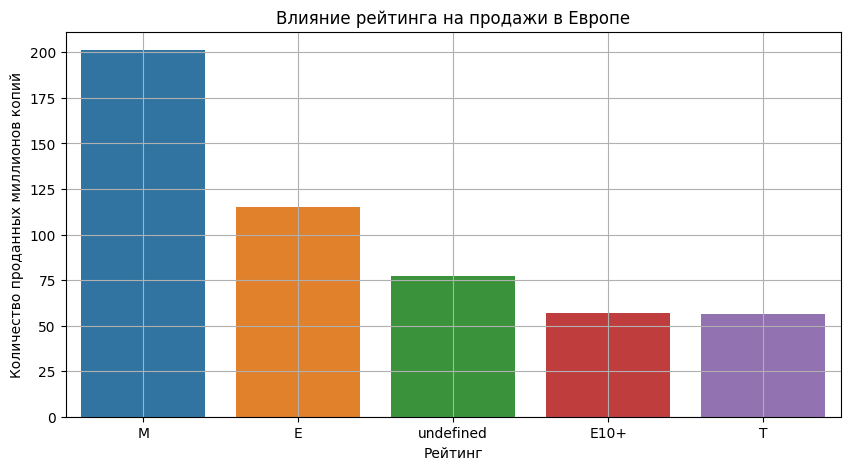

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


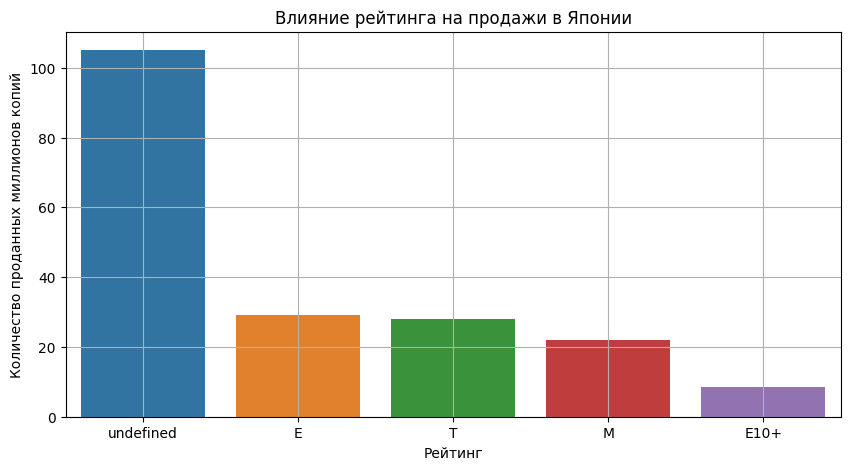

In [59]:
for r,a in regions.items():
    plt.figure(figsize=(10, 5))
    rating_regions = actual_data.pivot_table(index='rating', values= r, aggfunc='sum').sort_values(r, ascending=False).head()
    sns.barplot(data = rating_regions, x = rating_regions.index, y = r)
    plt.title(f'Влияние рейтинга на продажи в {a}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество проданных миллионов копий')
    plt.grid()
    plt.show()

Распределение продаж по рейтингам в Северной Америке и Европе одинаковое. Практически их зеркальный отражение является Япония.

## Проверка гипотез

Задаём пороговое значение alpha = 5%. Ограничимся верхним рекомендуемым порогом так как измеряем не самые стабильные параметры и большая точность может помешать так же как и то ,что в 5 случаях из 100 можем ошибиться.

Нулевая гипотеза гласит: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Следовательно альтернативная гипотеза будет двусторонней:Средние пользовательские рейтинги платформ Xbox One больше или меньше чем у PC.

In [60]:
actual_data_score = actual_data.dropna(subset=['user_score']) 

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
sample_1 = actual_data_score.query('platform == "XOne"')['user_score']
sample_2 = actual_data_score.query('platform == "PC"')['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

if results.pvalue < alpha:
    print(results.pvalue)
    print("Отвергаем нулевую гипотезу")
else:
    print(results.pvalue)
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5337346491462177
Не получилось отвергнуть нулевую гипотезу


В результате расчетов мы не можем утверждать, что рейтинги данных платформ различаются.

Нулевая гипотеза гласит:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Следовательно альтернативная гипотеза будет двусторонней:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) больше или меньше чем у Sports (англ. «спортивные соревнования»).

In [61]:
actual_data_score = actual_data.dropna(subset=['user_score']) 

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
sample_1 = actual_data_score.query('genre == "Action"')['user_score']
sample_2 = actual_data_score.query('genre == "Sports"')['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

if results.pvalue < alpha:
    print(results.pvalue)
    print("Отвергаем нулевую гипотезу")
else:
    print(results.pvalue)
    print("Не получилось отвергнуть нулевую гипотезу") 

5.760889081424721e-20
Отвергаем нулевую гипотезу


В результате расчетов мы не можем утверждать, что рейтинги данных жанров одинаковые.

## Общий вывод

Опираясь на проведенные исследования, делаю следующие рекомендации на 2017 год. Для начала определимся с рынком на котором будет распространяться игра. Было выявлен, что С.Америка и Европа схожи, а Япония сильно от них отличается в предпочтениях и использует свою систему оценки возрастного рейтинга. Также ее рынок в разы меньше двух других. Поэтому не будем рассматривать ее в планировании. Перейдем к выбору платформы. На данный момент заметный рост по числу проданных копий имеют две платформы PS4 и XOne. На выбранных рынках в топе представителе данных платформ , а PS4 уже занимает лидирующее позиции. Перейдем к выбору жанра. Одни и те же места в топе сейчас занимают Action-1, Shooter-2, Sports-3 Role-Playing-4. Отбросим Action так как согласно исследованию он может лидировать из-за большого количества выпускаемых игр, а не из-за большого спроса на оду игру в этом плане выигрывают Shooter, Sports. На обоих рынках лидируют рейтинги M и E. Также нужно не забыть оправить критикам бесплатные копии их высокие оценки могут способствовать продажам.